In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

from statsmodels.tools.eval_measures import rmse
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
train = pd.read_csv('datasets/podzielone/ml/stacjonarne/train_ml.csv', index_col=0)
val1 = pd.read_csv('datasets/podzielone/ml/stacjonarne/valid1_ml.csv', index_col=0)
val2 = pd.read_csv('datasets/podzielone/ml/stacjonarne/valid2_ml.csv', index_col=0)
val3 = pd.read_csv('datasets/podzielone/ml/stacjonarne/valid3_ml.csv', index_col=0)
test = pd.read_csv('datasets/podzielone/ml/stacjonarne/test_ml.csv', index_col=0)




train.index = pd.to_datetime(train.index)
val1.index = pd.to_datetime(val1.index)
val2.index = pd.to_datetime(val2.index)
val3.index = pd.to_datetime(val3.index)
test.index = pd.to_datetime(test.index)


train["day_of_week"] = train.index.dayofweek
train["day_of_year"] = train.index.dayofweek
train["week"] = train.index.week
train["quarter"] = train.index.quarter
train["return_ratio"] = train.y_return_ratio.shift()

val1["day_of_week"] = val1.index.dayofweek
val1["day_of_year"] = val1.index.dayofweek
val1["week"] = val1.index.week
val1["quarter"] = val1.index.quarter
val1["return_ratio"] = val1.y_return_ratio.shift()

val2["day_of_week"] = val2.index.dayofweek
val2["day_of_year"] = val2.index.dayofweek
val2["week"] = val2.index.week
val2["quarter"] = val2.index.quarter
val2["return_ratio"] = val2.y_return_ratio.shift()

val3["day_of_week"] = val3.index.dayofweek
val3["day_of_year"] = val3.index.dayofweek
val3["week"] = val3.index.week
val3["quarter"] = val3.index.quarter
val3["return_ratio"] = val3.y_return_ratio.shift()

test["day_of_week"] = test.index.dayofweek
test["day_of_year"] = test.index.dayofweek
test["week"] = test.index.week
test["quarter"] = test.index.quarter
test["return_ratio"] = test.y_return_ratio.shift()

whole = pd.concat([train, val1, val2, val3, test]).asfreq('B', method='bfill').fillna(method='bfill')
val = pd.concat([val1, val2, val3]).asfreq('B', method='bfill').fillna(method='bfill')

train.columns=train.columns.str.replace('(','')
train.columns=train.columns.str.replace(']','')

val1.columns=val1.columns.str.replace('(','')
val1.columns=val1.columns.str.replace(']','')
val2.columns=val2.columns.str.replace('(','')
val2.columns=val2.columns.str.replace(']','')
val3.columns=val3.columns.str.replace('(','')
val3.columns=val3.columns.str.replace(']','')

val.columns=val.columns.str.replace('(','')
val.columns=val.columns.str.replace(']','')


train1 = train.asfreq('B', method='bfill').fillna(method='bfill')
train2 = pd.concat([train, val1]).asfreq('B', method='bfill').fillna(method='bfill')
train3 = pd.concat([train, val1, val2]).asfreq('B', method='bfill').fillna(method='bfill')

val1 = val1.asfreq('B', method='bfill').fillna(method='bfill')
val2 = val2.asfreq('B', method='bfill').fillna(method='bfill')
val3 = val3.asfreq('B', method='bfill').fillna(method='bfill')
test = test.asfreq('B', method='bfill').fillna(method='bfill')



display(train.head(3))
display(val1.head(3))
display(val2.head(3))
display(val3.head(3))
display(test.head(3))
display(whole.head(3))

,y_return_ratio,return_ratio_shift_1,return_ratio_shift_2,return_ratio_shift_3,return_ratio_shift_4,return_ratio_shift_5,return_ratio_shift_6,return_ratio_shift_7,TensorFlow__diff_1_shift_4,deep learning__diff_1_shift_4,...,ATVI_gaming_rr,TTWO_gaming_rr,AMD_rr,SandP_rr,NasdaqTech_rr,day_of_week,day_of_year,week,quarter,return_ratio
2012-07-02,-0.026773,0.007610,0.032207,0.011120,-0.031538,0.012461,-0.045353,0.015861,0.0,0.100000,...,0.028212,0.015062,0.042357,0.011922,0.019487,0,0,27,3,NaN
2012-07-03,0.026022,0.043807,0.007610,0.032207,0.011120,-0.031538,0.012461,-0.045353,0.0,0.033333,...,0.010553,0.000530,0.015901,0.013208,0.011249,1,1,27,3,-0.026773
2012-07-05,-0.010145,-0.026773,0.043807,0.007610,0.032207,0.011120,-0.031538,0.012461,0.0,0.033333,...,0.021303,0.017479,0.026957,0.004373,0.002684,3,3,27,3,0.026022


,y_return_ratio,return_ratio_shift_1,return_ratio_shift_2,return_ratio_shift_3,return_ratio_shift_4,return_ratio_shift_5,return_ratio_shift_6,return_ratio_shift_7,TensorFlow__diff_1_shift_4,deep learning__diff_1_shift_4,...,ATVI_gaming_rr,TTWO_gaming_rr,AMD_rr,SandP_rr,NasdaqTech_rr,day_of_week,day_of_year,week,quarter,return_ratio
2018-01-02,0.030233,0.001166,-0.001368,0.011113,-0.003165,-0.004624,0.003518,-0.009045,-0.032258,0.096774,...,0.001341,0.005920,-0.012784,-0.002025,-0.005463,1,1,1,1,0.030233
2018-01-03,0.065814,-0.019757,0.001166,-0.001368,0.011113,-0.003165,-0.004624,0.003518,-0.129032,0.387097,...,0.007407,0.017018,0.026379,0.003129,0.007868,2,2,1,1,0.030233
2018-01-04,0.005271,0.030233,-0.019757,0.001166,-0.001368,0.011113,-0.003165,-0.004624,-0.032258,0.096774,...,0.015722,0.019918,0.082243,0.005831,0.013572,3,3,1,1,0.065814


,y_return_ratio,return_ratio_shift_1,return_ratio_shift_2,return_ratio_shift_3,return_ratio_shift_4,return_ratio_shift_5,return_ratio_shift_6,return_ratio_shift_7,TensorFlow__diff_1_shift_4,deep learning__diff_1_shift_4,...,ATVI_gaming_rr,TTWO_gaming_rr,AMD_rr,SandP_rr,NasdaqTech_rr,day_of_week,day_of_year,week,quarter,return_ratio
2018-03-01,-0.040455,-0.002109,0.002643,0.015610,0.002650,-0.030392,0.021490,-0.010791,0.285714,-0.071429,...,0.004256,-0.004988,-0.007612,-0.010339,-0.004857,3,3,9,1,-0.040455
2018-03-02,0.018647,-0.016500,-0.002109,0.002643,0.015610,0.002650,-0.030392,0.021490,0.285714,-0.071429,...,-0.007588,-0.027815,-0.024627,-0.013666,-0.012133,4,4,9,1,-0.040455
2018-03-05,-0.003763,-0.040455,-0.016500,-0.002109,0.002643,0.015610,0.002650,-0.030392,0.857143,-0.214286,...,0.000413,-0.007027,-0.028146,-0.007927,-0.005995,0,0,10,1,0.018647


,y_return_ratio,return_ratio_shift_1,return_ratio_shift_2,return_ratio_shift_3,return_ratio_shift_4,return_ratio_shift_5,return_ratio_shift_6,return_ratio_shift_7,TensorFlow__diff_1_shift_4,deep learning__diff_1_shift_4,...,ATVI_gaming_rr,TTWO_gaming_rr,AMD_rr,SandP_rr,NasdaqTech_rr,day_of_week,day_of_year,week,quarter,return_ratio
2018-05-01,0.009960,0.004929,0.039509,-0.020524,-0.011971,-0.021118,-0.001441,-0.031011,0.066667,0.033333,...,-0.002038,0.007704,-0.016584,-0.002772,-0.008446,1,1,18,2,0.009960
2018-05-02,-0.003654,-0.006318,0.004929,0.039509,-0.020524,-0.011971,-0.021118,-0.001441,0.066667,0.033333,...,0.013161,0.017689,0.000912,-0.006153,-0.001804,2,2,18,2,0.009960
2018-05-03,0.029517,0.009960,-0.006318,0.004929,0.039509,-0.020524,-0.011971,-0.021118,0.066667,0.033333,...,0.017768,0.025826,0.005009,-0.001482,0.004321,3,3,18,2,-0.003654


,y_return_ratio,return_ratio_shift_1,return_ratio_shift_2,return_ratio_shift_3,return_ratio_shift_4,return_ratio_shift_5,return_ratio_shift_6,return_ratio_shift_7,TensorFlow__diff_1_shift_4,deep learning__diff_1_shift_4,...,ATVI_gaming_rr,TTWO_gaming_rr,AMD_rr,SandP_rr,NasdaqTech_rr,day_of_week,day_of_year,week,quarter,return_ratio
2018-07-02,0.022541,0.021806,-0.025910,0.012002,-0.047141,-0.023959,-0.019824,0.008225,-0.400000,-0.100000,...,0.018332,0.022284,0.007958,0.005633,0.010789,0,0,27,3,0.022541
2018-07-03,-0.022292,-0.016441,0.021806,-0.025910,0.012002,-0.047141,-0.023959,-0.019824,-0.133333,-0.033333,...,-0.000786,0.002361,-0.014474,-0.002542,-0.001850,1,1,27,3,0.022541
2018-07-04,0.024869,0.022541,-0.016441,0.021806,-0.025910,0.012002,-0.047141,-0.023959,-0.133333,-0.033333,...,0.006027,0.001725,0.008344,0.002730,0.005586,3,3,27,3,-0.022292


,y_return_ratio,return_ratio_shift_1,return_ratio_shift_2,return_ratio_shift_3,return_ratio_shift_4,return_ratio_shift_5,return_ratio_shift_6,return_ratio_shift_7,TensorFlow__diff_1_shift_4,deep learning__diff_1_shift_4,...,ATVI_gaming_rr,TTWO_gaming_rr,AMD_rr,SandP_rr,NasdaqTech_rr,day_of_week,day_of_year,week,quarter,return_ratio
2012-07-02,-0.026773,0.007610,0.032207,0.011120,-0.031538,0.012461,-0.045353,0.015861,0.0,0.100000,...,0.028212,0.015062,0.042357,0.011922,0.019487,0,0,27,3,-0.026773
2012-07-03,0.026022,0.043807,0.007610,0.032207,0.011120,-0.031538,0.012461,-0.045353,0.0,0.033333,...,0.010553,0.000530,0.015901,0.013208,0.011249,1,1,27,3,-0.026773
2012-07-04,-0.010145,-0.026773,0.043807,0.007610,0.032207,0.011120,-0.031538,0.012461,0.0,0.033333,...,0.021303,0.017479,0.026957,0.004373,0.002684,3,3,27,3,0.026022


In [3]:
S = [(train1, val1), (train2, val2), (train3, val3)]

In [4]:
variables = train.columns.tolist()
variables.remove("y_return_ratio")
features = train[variables].columns
target = 'y_return_ratio'

# Korelacje Spearmana

In [5]:
corr_matrix = whole.drop(columns=['y_return_ratio']).corr("spearman").abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

var1 = [col for col in upper.columns if upper[col].max() < 0.9]
var2 = [col for col in upper.columns if upper[col].max() < 0.7]
var3 = [col for col in upper.columns if upper[col].max() < 0.5]
var4 = [col for col in upper.columns if upper[col].max() < 0.4]
var5 = [col for col in upper.columns if upper[col].max() < 0.3]

print(len(var1))
print(len(var2))
print(len(var3))
print(len(var4))

print(len(var5))

41
36
28
24
17


# ExtraTreesRegression

In [6]:
X_train1 = train1[var5]
y_train1 = train1[target]
X_test1 = val[var5]
y_test1 = val[target]

model = ExtraTreesRegressor()
model.fit(X_train1, y_train1)
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train1.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importance
day_of_week,0.083691
AD_diff_1,0.083387
return_ratio_shift_2,0.075446
return_ratio_shift_7,0.071301
return_ratio_shift_3,0.066728
TensorFlow__diff_1_shift_4,0.065795
SAR_diff_1_shift_13,0.065260
return_ratio_shift_6,0.061199
gaming_news_diff_1_shift_2,0.060705
MINUS_DM_diff_1_shift_8,0.059706


# LSTM

Instructions for updating:
Colocations handled automatically by placer.


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Instructions for updating:
Use tf.cast instead.
Train on 1135 samples, validate on 300 samples
Epoch 1/3
1135/1135 [==============================] - 1s 686us/step - loss: 0.1191 - val_loss: 0.0855
Epoch 2/3
1135/1135 [==============================] - 0s 89us/step - loss: 0.0660 - val_loss: 0.0917
Epoch 3/3
1135/1135 [==============================] - 0s 85us/step - loss: 0.0583 - val_loss: 0.0885


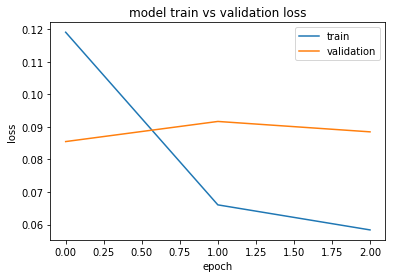

[-0.0025860304]
0 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1137 samples, validate on 300 samples
Epoch 1/3
1137/1137 [==============================] - 1s 607us/step - loss: 0.0802 - val_loss: 0.1001
Epoch 2/3
1137/1137 [==============================] - 0s 80us/step - loss: 0.0648 - val_loss: 0.0920
Epoch 3/3
1137/1137 [==============================] - 0s 96us/step - loss: 0.0596 - val_loss: 0.0852


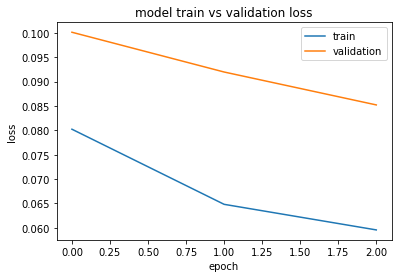

[-0.0025860304, -0.0018729987]
1 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1138 samples, validate on 300 samples
Epoch 1/3
1138/1138 [==============================] - 1s 771us/step - loss: 0.2841 - val_loss: 0.1519
Epoch 2/3
1138/1138 [==============================] - 0s 71us/step - loss: 0.1064 - val_loss: 0.1166
Epoch 3/3
1138/1138 [==============================] - 0s 72us/step - loss: 0.0722 - val_loss: 0.0900


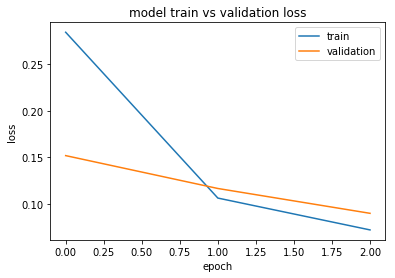

[-0.0025860304, -0.0018729987, 0.010582481]
2 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1139 samples, validate on 300 samples
Epoch 1/3
1139/1139 [==============================] - 1s 859us/step - loss: 0.2738 - val_loss: 0.1705
Epoch 2/3
1139/1139 [==============================] - 0s 72us/step - loss: 0.1042 - val_loss: 0.1253
Epoch 3/3
1139/1139 [==============================] - 0s 72us/step - loss: 0.0748 - val_loss: 0.0872


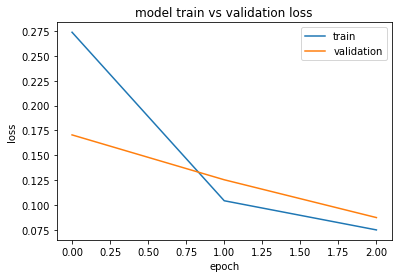

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675]
3 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1140 samples, validate on 300 samples
Epoch 1/3
1140/1140 [==============================] - 1s 894us/step - loss: 0.1781 - val_loss: 0.1152
Epoch 2/3
1140/1140 [==============================] - 0s 53us/step - loss: 0.0698 - val_loss: 0.0743
Epoch 3/3
1140/1140 [==============================] - 0s 58us/step - loss: 0.0458 - val_loss: 0.0492


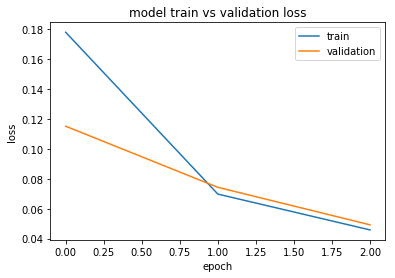

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124]
4 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1141 samples, validate on 300 samples
Epoch 1/3
1141/1141 [==============================] - 1s 985us/step - loss: 0.0644 - val_loss: 0.0584
Epoch 2/3
1141/1141 [==============================] - 0s 56us/step - loss: 0.0409 - val_loss: 0.0620
Epoch 3/3
1141/1141 [==============================] - 0s 56us/step - loss: 0.0404 - val_loss: 0.0492


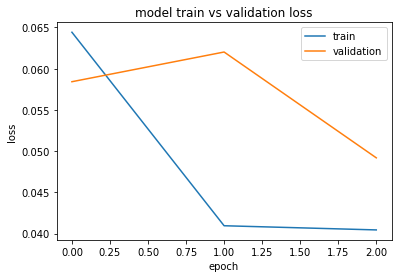

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281]
5 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1142 samples, validate on 300 samples
Epoch 1/3
1142/1142 [==============================] - 1s 1ms/step - loss: 0.2079 - val_loss: 0.1431
Epoch 2/3
1142/1142 [==============================] - 0s 59us/step - loss: 0.0763 - val_loss: 0.0556
Epoch 3/3
1142/1142 [==============================] - 0s 60us/step - loss: 0.0464 - val_loss: 0.0503


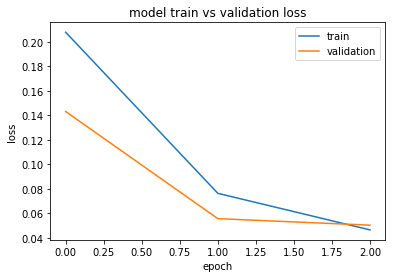

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608]
6 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1143 samples, validate on 300 samples
Epoch 1/3
1143/1143 [==============================] - 1s 1ms/step - loss: 0.2391 - val_loss: 0.1391
Epoch 2/3
1143/1143 [==============================] - 0s 62us/step - loss: 0.0829 - val_loss: 0.0796
Epoch 3/3
1143/1143 [==============================] - 0s 56us/step - loss: 0.0485 - val_loss: 0.0485


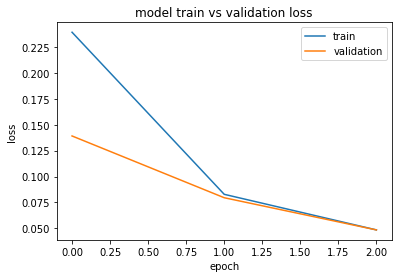

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529]
7 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1144 samples, validate on 300 samples
Epoch 1/3
1144/1144 [==============================] - 2s 1ms/step - loss: 0.0776 - val_loss: 0.0740
Epoch 2/3
1144/1144 [==============================] - 0s 72us/step - loss: 0.0481 - val_loss: 0.0493
Epoch 3/3
1144/1144 [==============================] - 0s 77us/step - loss: 0.0371 - val_loss: 0.0485


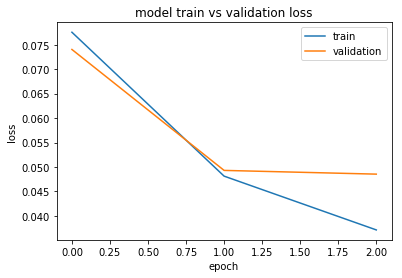

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903]
8 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1145 samples, validate on 300 samples
Epoch 1/3
1145/1145 [==============================] - 2s 1ms/step - loss: 0.1213 - val_loss: 0.0492
Epoch 2/3
1145/1145 [==============================] - 0s 151us/step - loss: 0.0552 - val_loss: 0.0680
Epoch 3/3
1145/1145 [==============================] - 0s 134us/step - loss: 0.0427 - val_loss: 0.0493


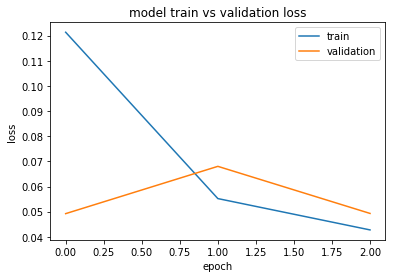

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535]
9 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1146 samples, validate on 300 samples
Epoch 1/3
1146/1146 [==============================] - 2s 2ms/step - loss: 0.0411 - val_loss: 0.0491
Epoch 2/3
1146/1146 [==============================] - 0s 75us/step - loss: 0.0386 - val_loss: 0.0515
Epoch 3/3
1146/1146 [==============================] - 0s 72us/step - loss: 0.0356 - val_loss: 0.0487


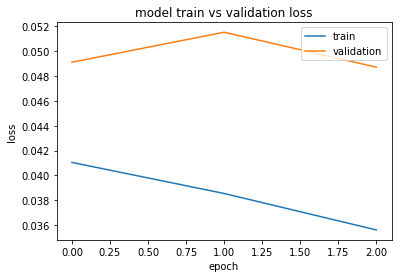

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977]
10 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1147 samples, validate on 300 samples
Epoch 1/3
1147/1147 [==============================] - 2s 2ms/step - loss: 0.2952 - val_loss: 0.1495
Epoch 2/3
1147/1147 [==============================] - 0s 72us/step - loss: 0.0927 - val_loss: 0.0782
Epoch 3/3
1147/1147 [==============================] - 0s 68us/step - loss: 0.0538 - val_loss: 0.0575


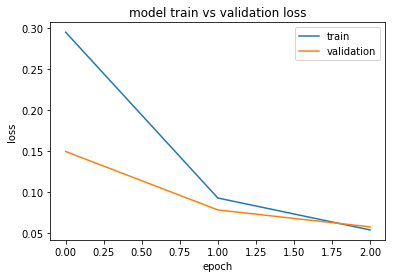

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569]
11 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1148 samples, validate on 300 samples
Epoch 1/3
1148/1148 [==============================] - 2s 2ms/step - loss: 0.1499 - val_loss: 0.0946
Epoch 2/3
1148/1148 [==============================] - 0s 72us/step - loss: 0.0553 - val_loss: 0.0484
Epoch 3/3
1148/1148 [==============================] - 0s 70us/step - loss: 0.0424 - val_loss: 0.0503


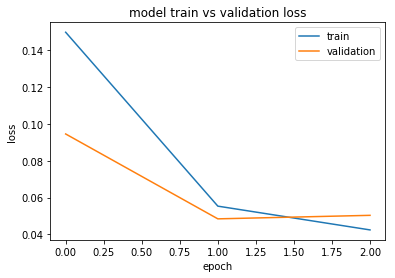

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475]
12 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1149 samples, validate on 300 samples
Epoch 1/3
1149/1149 [==============================] - 2s 2ms/step - loss: 0.1771 - val_loss: 0.0946
Epoch 2/3
1149/1149 [==============================] - 0s 78us/step - loss: 0.0614 - val_loss: 0.0513
Epoch 3/3
1149/1149 [==============================] - 0s 61us/step - loss: 0.0416 - val_loss: 0.0583


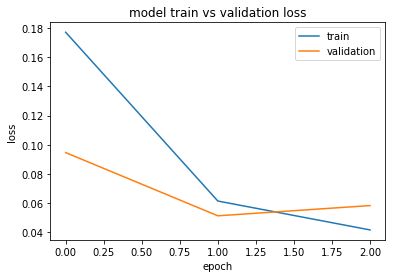

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417]
13 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1150 samples, validate on 300 samples
Epoch 1/3
1150/1150 [==============================] - 2s 2ms/step - loss: 0.1126 - val_loss: 0.0538
Epoch 2/3
1150/1150 [==============================] - 0s 55us/step - loss: 0.0478 - val_loss: 0.0502
Epoch 3/3
1150/1150 [==============================] - 0s 61us/step - loss: 0.0392 - val_loss: 0.0512


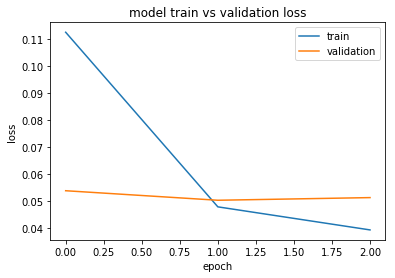

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423]
14 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1151 samples, validate on 300 samples
Epoch 1/3
1151/1151 [==============================] - 2s 2ms/step - loss: 0.0750 - val_loss: 0.0943
Epoch 2/3
1151/1151 [==============================] - 0s 57us/step - loss: 0.0743 - val_loss: 0.0769
Epoch 3/3
1151/1151 [==============================] - 0s 70us/step - loss: 0.0478 - val_loss: 0.0515


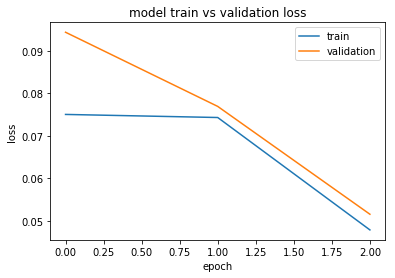

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025]
15 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1152 samples, validate on 300 samples
Epoch 1/3
1152/1152 [==============================] - 2s 2ms/step - loss: 1.0051 - val_loss: 0.5552
Epoch 2/3
1152/1152 [==============================] - 0s 61us/step - loss: 0.3084 - val_loss: 0.0613
Epoch 3/3
1152/1152 [==============================] - 0s 69us/step - loss: 0.1278 - val_loss: 0.1202


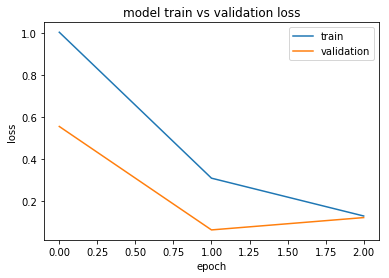

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055]
16 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1153 samples, validate on 300 samples
Epoch 1/3
1153/1153 [==============================] - 3s 2ms/step - loss: 0.3437 - val_loss: 0.1517
Epoch 2/3
1153/1153 [==============================] - 0s 116us/step - loss: 0.1082 - val_loss: 0.0939
Epoch 3/3
1153/1153 [==============================] - 0s 100us/step - loss: 0.0590 - val_loss: 0.0526


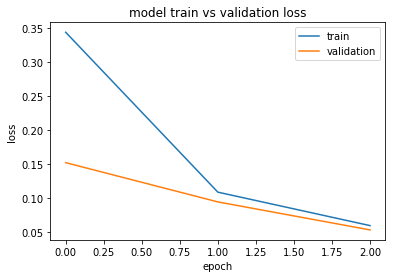

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185]
17 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1154 samples, validate on 300 samples
Epoch 1/3
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0610 - val_loss: 0.0484
Epoch 2/3
1154/1154 [==============================] - 0s 60us/step - loss: 0.0378 - val_loss: 0.0556
Epoch 3/3
1154/1154 [==============================] - 0s 62us/step - loss: 0.0436 - val_loss: 0.0491


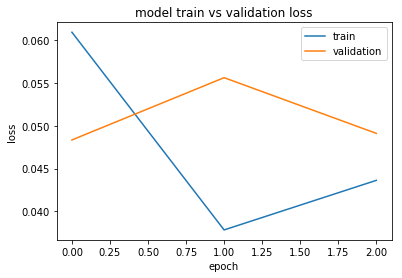

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419]
18 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1155 samples, validate on 300 samples
Epoch 1/3
1155/1155 [==============================] - 3s 2ms/step - loss: 0.1707 - val_loss: 0.0698
Epoch 2/3
1155/1155 [==============================] - 0s 66us/step - loss: 0.0591 - val_loss: 0.0507
Epoch 3/3
1155/1155 [==============================] - 0s 60us/step - loss: 0.0417 - val_loss: 0.0522


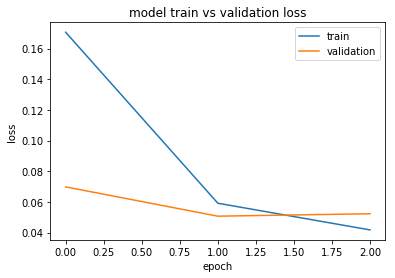

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313]
19 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1156 samples, validate on 300 samples
Epoch 1/3
1156/1156 [==============================] - 3s 3ms/step - loss: 0.1384 - val_loss: 0.0540
Epoch 2/3
1156/1156 [==============================] - 0s 63us/step - loss: 0.0523 - val_loss: 0.0614
Epoch 3/3
1156/1156 [==============================] - 0s 67us/step - loss: 0.0398 - val_loss: 0.0526


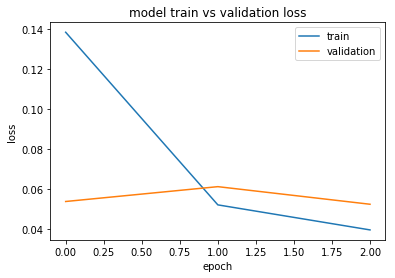

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261]
20 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1157 samples, validate on 300 samples
Epoch 1/3
1157/1157 [==============================] - 3s 3ms/step - loss: 0.0821 - val_loss: 0.0726
Epoch 2/3
1157/1157 [==============================] - 0s 73us/step - loss: 0.0469 - val_loss: 0.0532
Epoch 3/3
1157/1157 [==============================] - 0s 74us/step - loss: 0.0418 - val_loss: 0.0488


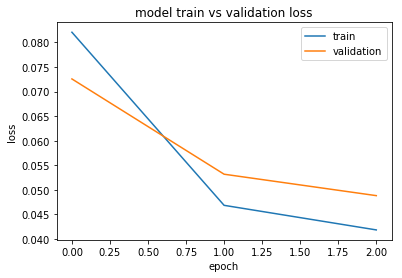

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397]
21 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1158 samples, validate on 300 samples
Epoch 1/3
1158/1158 [==============================] - 3s 3ms/step - loss: 0.7593 - val_loss: 0.3263
Epoch 2/3
1158/1158 [==============================] - 0s 89us/step - loss: 0.1493 - val_loss: 0.1617
Epoch 3/3
1158/1158 [==============================] - 0s 83us/step - loss: 0.0932 - val_loss: 0.0860


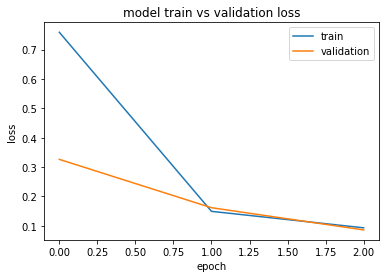

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503]
22 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1159 samples, validate on 300 samples
Epoch 1/3
1159/1159 [==============================] - 4s 3ms/step - loss: 0.1509 - val_loss: 0.0816
Epoch 2/3
1159/1159 [==============================] - 0s 74us/step - loss: 0.0585 - val_loss: 0.0487
Epoch 3/3
1159/1159 [==============================] - 0s 74us/step - loss: 0.0424 - val_loss: 0.0566


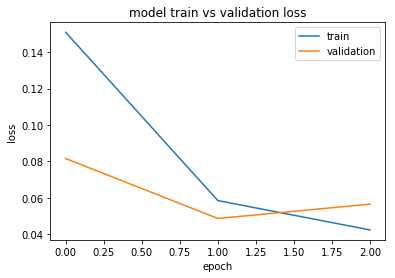

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149]
23 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1160 samples, validate on 300 samples
Epoch 1/3
1160/1160 [==============================] - 4s 3ms/step - loss: 0.1109 - val_loss: 0.0531
Epoch 2/3
1160/1160 [==============================] - 0s 70us/step - loss: 0.0556 - val_loss: 0.0599
Epoch 3/3
1160/1160 [==============================] - 0s 63us/step - loss: 0.0443 - val_loss: 0.0486


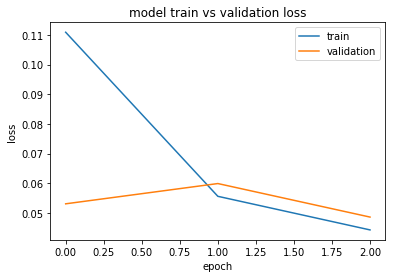

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816]
24 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1161 samples, validate on 300 samples
Epoch 1/3
1161/1161 [==============================] - 4s 3ms/step - loss: 0.2769 - val_loss: 0.1457
Epoch 2/3
1161/1161 [==============================] - 0s 69us/step - loss: 0.0923 - val_loss: 0.0871
Epoch 3/3
1161/1161 [==============================] - 0s 80us/step - loss: 0.0520 - val_loss: 0.0557


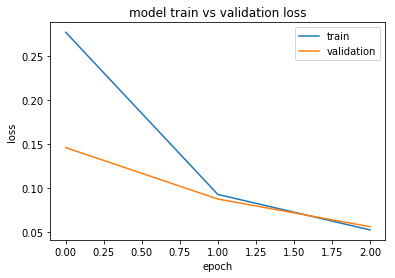

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901]
25 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1162 samples, validate on 300 samples
Epoch 1/3
1162/1162 [==============================] - 4s 3ms/step - loss: 0.0851 - val_loss: 0.0808
Epoch 2/3
1162/1162 [==============================] - 0s 88us/step - loss: 0.0656 - val_loss: 0.0629
Epoch 3/3
1162/1162 [==============================] - 0s 68us/step - loss: 0.0440 - val_loss: 0.0496


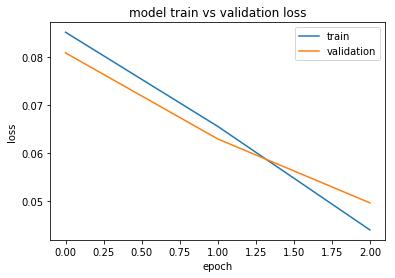

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942]
26 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1163 samples, validate on 300 samples
Epoch 1/3
1163/1163 [==============================] - 4s 3ms/step - loss: 0.0428 - val_loss: 0.0505
Epoch 2/3
1163/1163 [==============================] - 0s 92us/step - loss: 0.0376 - val_loss: 0.0490
Epoch 3/3
1163/1163 [==============================] - 0s 77us/step - loss: 0.0359 - val_loss: 0.0533


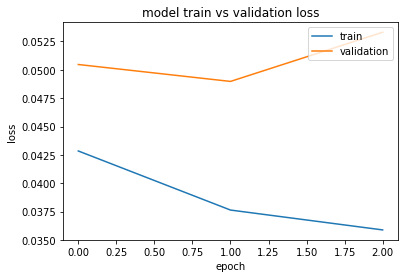

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156]
27 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1164 samples, validate on 300 samples
Epoch 1/3
1164/1164 [==============================] - 4s 3ms/step - loss: 0.3786 - val_loss: 0.0611
Epoch 2/3
1164/1164 [==============================] - 0s 77us/step - loss: 0.1199 - val_loss: 0.0510
Epoch 3/3
1164/1164 [==============================] - 0s 68us/step - loss: 0.0612 - val_loss: 0.0496


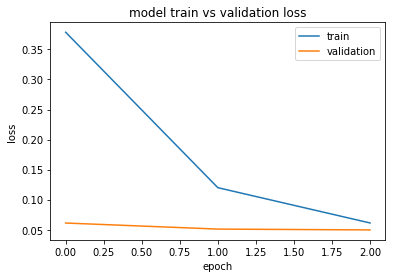

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625]
28 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1165 samples, validate on 300 samples
Epoch 1/3
1165/1165 [==============================] - 4s 4ms/step - loss: 0.1694 - val_loss: 0.0842
Epoch 2/3
1165/1165 [==============================] - 0s 68us/step - loss: 0.0624 - val_loss: 0.0497
Epoch 3/3
1165/1165 [==============================] - 0s 76us/step - loss: 0.0465 - val_loss: 0.0624


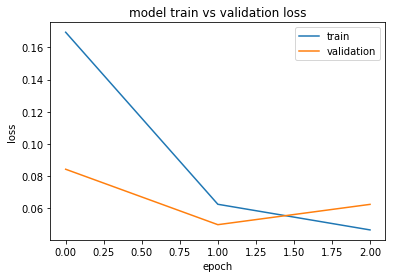

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784]
29 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1166 samples, validate on 300 samples
Epoch 1/3
1166/1166 [==============================] - 4s 4ms/step - loss: 0.1395 - val_loss: 0.0717
Epoch 2/3
1166/1166 [==============================] - 0s 68us/step - loss: 0.0520 - val_loss: 0.0508
Epoch 3/3
1166/1166 [==============================] - 0s 63us/step - loss: 0.0433 - val_loss: 0.0597


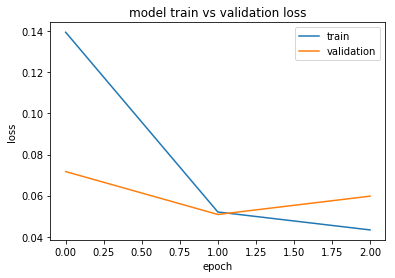

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799]
30 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1167 samples, validate on 300 samples
Epoch 1/3
1167/1167 [==============================] - 5s 4ms/step - loss: 0.1464 - val_loss: 0.0537
Epoch 2/3
1167/1167 [==============================] - 0s 73us/step - loss: 0.0504 - val_loss: 0.0618
Epoch 3/3
1167/1167 [==============================] - 0s 71us/step - loss: 0.0444 - val_loss: 0.0497


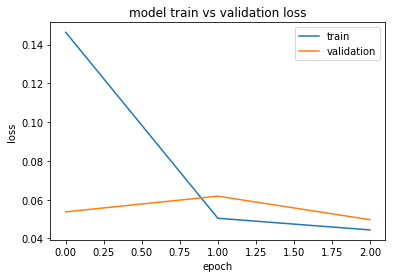

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604]
31 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1168 samples, validate on 300 samples
Epoch 1/3
1168/1168 [==============================] - 5s 4ms/step - loss: 0.2234 - val_loss: 0.1428
Epoch 2/3
1168/1168 [==============================] - 0s 79us/step - loss: 0.0751 - val_loss: 0.0552
Epoch 3/3
1168/1168 [==============================] - 0s 75us/step - loss: 0.0427 - val_loss: 0.0539


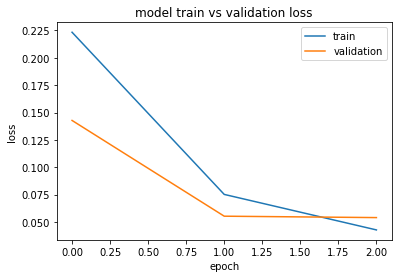

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307]
32 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1169 samples, validate on 300 samples
Epoch 1/3
1169/1169 [==============================] - 5s 4ms/step - loss: 0.1697 - val_loss: 0.1132
Epoch 2/3
1169/1169 [==============================] - 0s 85us/step - loss: 0.0629 - val_loss: 0.0520
Epoch 3/3
1169/1169 [==============================] - 0s 76us/step - loss: 0.0408 - val_loss: 0.0512


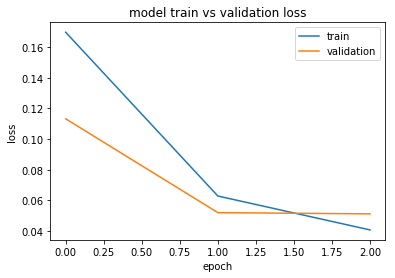

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152]
33 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1170 samples, validate on 300 samples
Epoch 1/3
1170/1170 [==============================] - 5s 4ms/step - loss: 0.3884 - val_loss: 0.0729
Epoch 2/3
1170/1170 [==============================] - 0s 59us/step - loss: 0.1264 - val_loss: 0.0501
Epoch 3/3
1170/1170 [==============================] - 0s 63us/step - loss: 0.0618 - val_loss: 0.0502


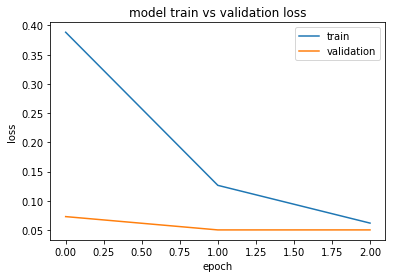

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252]
34 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1171 samples, validate on 300 samples
Epoch 1/3
1171/1171 [==============================] - 5s 4ms/step - loss: 0.1169 - val_loss: 0.0676
Epoch 2/3
1171/1171 [==============================] - 0s 64us/step - loss: 0.0485 - val_loss: 0.0555
Epoch 3/3
1171/1171 [==============================] - 0s 61us/step - loss: 0.0450 - val_loss: 0.0496


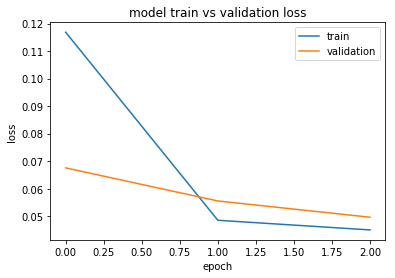

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288]
35 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1172 samples, validate on 300 samples
Epoch 1/3
1172/1172 [==============================] - 5s 4ms/step - loss: 0.1408 - val_loss: 0.0528
Epoch 2/3
1172/1172 [==============================] - 0s 61us/step - loss: 0.0501 - val_loss: 0.0533
Epoch 3/3
1172/1172 [==============================] - 0s 62us/step - loss: 0.0385 - val_loss: 0.0492


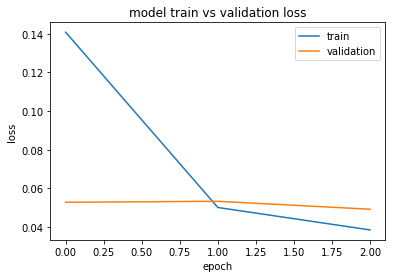

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988]
36 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1173 samples, validate on 300 samples
Epoch 1/3
1173/1173 [==============================] - 6s 5ms/step - loss: 0.4366 - val_loss: 0.0509
Epoch 2/3
1173/1173 [==============================] - 0s 84us/step - loss: 0.1178 - val_loss: 0.0507
Epoch 3/3
1173/1173 [==============================] - 0s 72us/step - loss: 0.0563 - val_loss: 0.0499


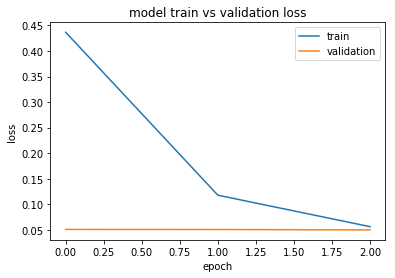

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514]
37 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1174 samples, validate on 300 samples
Epoch 1/3
1174/1174 [==============================] - 5s 5ms/step - loss: 0.0436 - val_loss: 0.0489
Epoch 2/3
1174/1174 [==============================] - 0s 68us/step - loss: 0.0392 - val_loss: 0.0489
Epoch 3/3
1174/1174 [==============================] - 0s 63us/step - loss: 0.0362 - val_loss: 0.0486


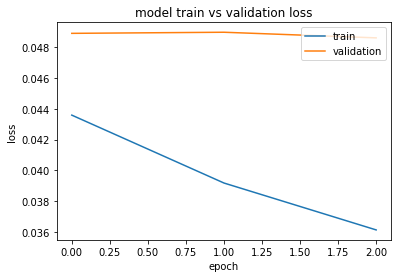

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664]
38 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1175 samples, validate on 300 samples
Epoch 1/3
1175/1175 [==============================] - 6s 5ms/step - loss: 0.1672 - val_loss: 0.0806
Epoch 2/3
1175/1175 [==============================] - 0s 64us/step - loss: 0.0588 - val_loss: 0.0623
Epoch 3/3
1175/1175 [==============================] - 0s 63us/step - loss: 0.0446 - val_loss: 0.0485


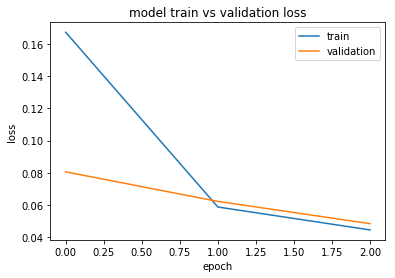

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284]
39 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1176 samples, validate on 300 samples
Epoch 1/3
1176/1176 [==============================] - 6s 5ms/step - loss: 0.0665 - val_loss: 0.0578
Epoch 2/3
1176/1176 [==============================] - 0s 63us/step - loss: 0.0431 - val_loss: 0.0496
Epoch 3/3
1176/1176 [==============================] - 0s 63us/step - loss: 0.0385 - val_loss: 0.0479


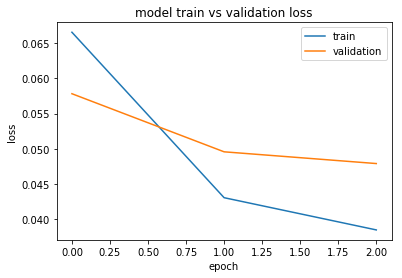

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424]
40 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1177 samples, validate on 300 samples
Epoch 1/3
1177/1177 [==============================] - 6s 5ms/step - loss: 0.0686 - val_loss: 0.0602
Epoch 2/3
1177/1177 [==============================] - 0s 61us/step - loss: 0.0414 - val_loss: 0.0508
Epoch 3/3
1177/1177 [==============================] - 0s 63us/step - loss: 0.0368 - val_loss: 0.0478


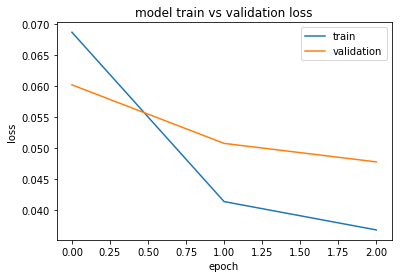

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855]
41 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1178 samples, validate on 300 samples
Epoch 1/3
1178/1178 [==============================] - 6s 5ms/step - loss: 0.0502 - val_loss: 0.0484
Epoch 2/3
1178/1178 [==============================] - 0s 67us/step - loss: 0.0412 - val_loss: 0.0490
Epoch 3/3
1178/1178 [==============================] - 0s 63us/step - loss: 0.0392 - val_loss: 0.0481


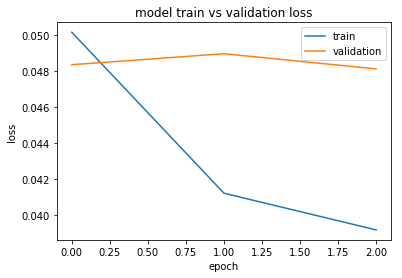

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714]
42 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1179 samples, validate on 300 samples
Epoch 1/3
1179/1179 [==============================] - 6s 5ms/step - loss: 0.2545 - val_loss: 0.1493
Epoch 2/3
1179/1179 [==============================] - 0s 75us/step - loss: 0.0913 - val_loss: 0.0918
Epoch 3/3
1179/1179 [==============================] - 0s 71us/step - loss: 0.0554 - val_loss: 0.0519


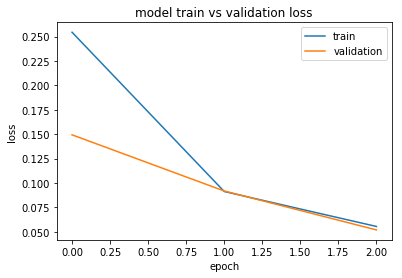

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212]
43 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1180 samples, validate on 300 samples
Epoch 1/3
1180/1180 [==============================] - 6s 5ms/step - loss: 0.1069 - val_loss: 0.0477
Epoch 2/3
1180/1180 [==============================] - 0s 59us/step - loss: 0.0523 - val_loss: 0.0578
Epoch 3/3
1180/1180 [==============================] - 0s 59us/step - loss: 0.0457 - val_loss: 0.0537


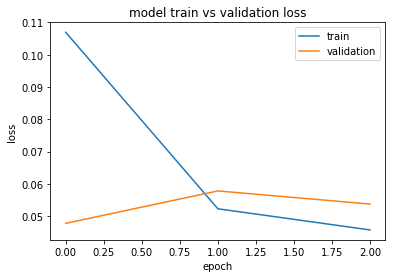

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333]
44 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1181 samples, validate on 300 samples
Epoch 1/3
1181/1181 [==============================] - 7s 6ms/step - loss: 0.4453 - val_loss: 0.0753
Epoch 2/3
1181/1181 [==============================] - 0s 64us/step - loss: 0.0945 - val_loss: 0.0826
Epoch 3/3
1181/1181 [==============================] - 0s 72us/step - loss: 0.0790 - val_loss: 0.0573


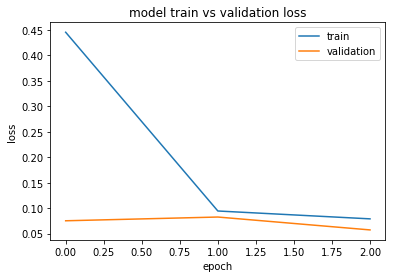

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382]
45 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1182 samples, validate on 300 samples
Epoch 1/3
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0647 - val_loss: 0.0578
Epoch 2/3
1182/1182 [==============================] - 0s 102us/step - loss: 0.0435 - val_loss: 0.0533
Epoch 3/3
1182/1182 [==============================] - 0s 103us/step - loss: 0.0407 - val_loss: 0.0477


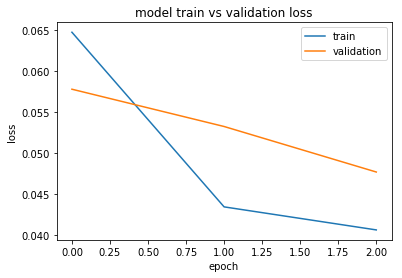

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265]
46 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1183 samples, validate on 300 samples
Epoch 1/3
1183/1183 [==============================] - 8s 6ms/step - loss: 0.0488 - val_loss: 0.0550
Epoch 2/3
1183/1183 [==============================] - 0s 113us/step - loss: 0.0405 - val_loss: 0.0491
Epoch 3/3
1183/1183 [==============================] - 0s 167us/step - loss: 0.0370 - val_loss: 0.0491


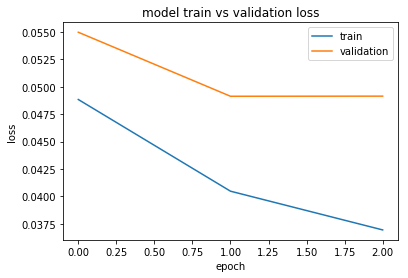

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747]
47 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1184 samples, validate on 300 samples
Epoch 1/3
1184/1184 [==============================] - 7s 6ms/step - loss: 0.0421 - val_loss: 0.0481
Epoch 2/3
1184/1184 [==============================] - 0s 70us/step - loss: 0.0365 - val_loss: 0.0514
Epoch 3/3
1184/1184 [==============================] - 0s 76us/step - loss: 0.0424 - val_loss: 0.0499


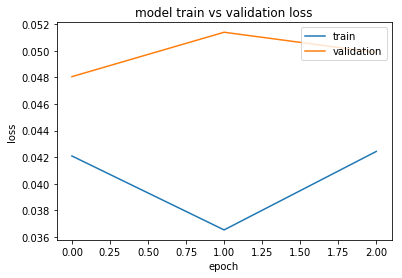

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747]
48 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1185 samples, validate on 300 samples
Epoch 1/3
1185/1185 [==============================] - 7s 6ms/step - loss: 0.0438 - val_loss: 0.0474
Epoch 2/3
1185/1185 [==============================] - 0s 68us/step - loss: 0.0364 - val_loss: 0.0506
Epoch 3/3
1185/1185 [==============================] - 0s 63us/step - loss: 0.0387 - val_loss: 0.0475


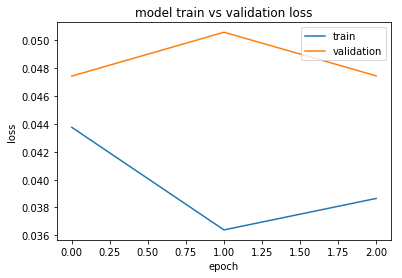

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297]
49 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1186 samples, validate on 300 samples
Epoch 1/3
1186/1186 [==============================] - 8s 6ms/step - loss: 0.0465 - val_loss: 0.0473
Epoch 2/3
1186/1186 [==============================] - 0s 127us/step - loss: 0.0373 - val_loss: 0.0495
Epoch 3/3
1186/1186 [==============================] - 0s 120us/step - loss: 0.0364 - val_loss: 0.0474


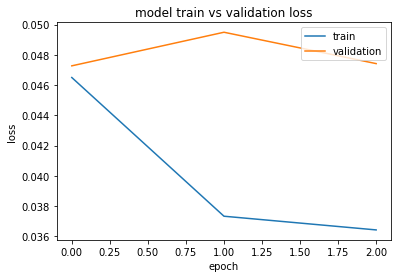

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338]
50 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1187 samples, validate on 300 samples
Epoch 1/3
1187/1187 [==============================] - 8s 7ms/step - loss: 0.2002 - val_loss: 0.1050
Epoch 2/3
1187/1187 [==============================] - 0s 142us/step - loss: 0.0678 - val_loss: 0.0481
Epoch 3/3
1187/1187 [==============================] - 0s 122us/step - loss: 0.0425 - val_loss: 0.0545


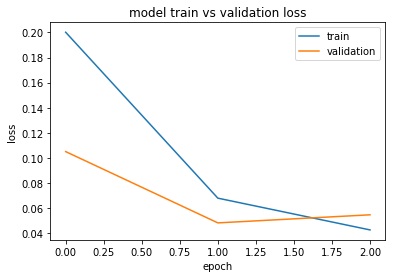

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837]
51 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1188 samples, validate on 300 samples
Epoch 1/3
1188/1188 [==============================] - 8s 7ms/step - loss: 0.9398 - val_loss: 0.4994
Epoch 2/3
1188/1188 [==============================] - 0s 110us/step - loss: 0.2230 - val_loss: 0.1643
Epoch 3/3
1188/1188 [==============================] - 0s 111us/step - loss: 0.1314 - val_loss: 0.0629


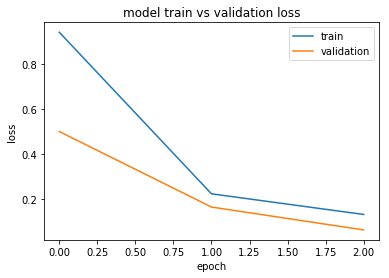

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973]
52 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1189 samples, validate on 300 samples
Epoch 1/3
1189/1189 [==============================] - 9s 7ms/step - loss: 0.3389 - val_loss: 0.0863
Epoch 2/3
1189/1189 [==============================] - 0s 119us/step - loss: 0.1006 - val_loss: 0.0613
Epoch 3/3
1189/1189 [==============================] - 0s 115us/step - loss: 0.0576 - val_loss: 0.0524


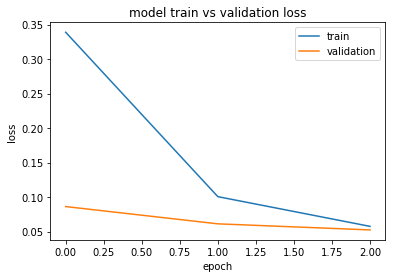

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642]
53 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1190 samples, validate on 300 samples
Epoch 1/3
1190/1190 [==============================] - 9s 8ms/step - loss: 0.0951 - val_loss: 0.0566
Epoch 2/3
1190/1190 [==============================] - 0s 108us/step - loss: 0.0530 - val_loss: 0.0545
Epoch 3/3
1190/1190 [==============================] - 0s 108us/step - loss: 0.0409 - val_loss: 0.0471


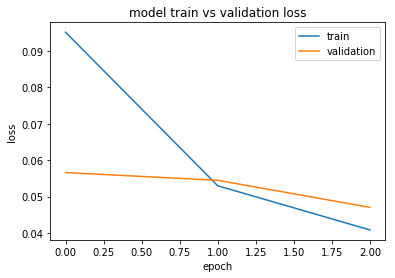

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565]
54 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1191 samples, validate on 300 samples
Epoch 1/3
1191/1191 [==============================] - 10s 8ms/step - loss: 0.1161 - val_loss: 0.0482
Epoch 2/3
1191/1191 [==============================] - 0s 157us/step - loss: 0.0503 - val_loss: 0.0535
Epoch 3/3
1191/1191 [==============================] - 0s 189us/step - loss: 0.0420 - val_loss: 0.0474


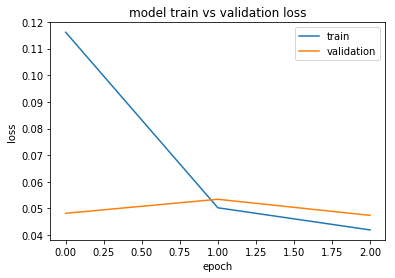

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711]
55 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1192 samples, validate on 300 samples
Epoch 1/3
1192/1192 [==============================] - 9s 8ms/step - loss: 0.0581 - val_loss: 0.0474
Epoch 2/3
1192/1192 [==============================] - 0s 116us/step - loss: 0.0425 - val_loss: 0.0477
Epoch 3/3
1192/1192 [==============================] - 0s 193us/step - loss: 0.0439 - val_loss: 0.0494


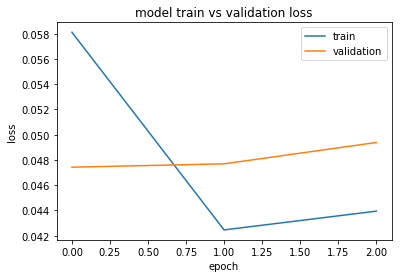

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394]
56 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1193 samples, validate on 300 samples
Epoch 1/3
1193/1193 [==============================] - 9s 8ms/step - loss: 0.3259 - val_loss: 0.1188
Epoch 2/3
1193/1193 [==============================] - 0s 111us/step - loss: 0.0952 - val_loss: 0.0816
Epoch 3/3
1193/1193 [==============================] - 0s 110us/step - loss: 0.0531 - val_loss: 0.0528


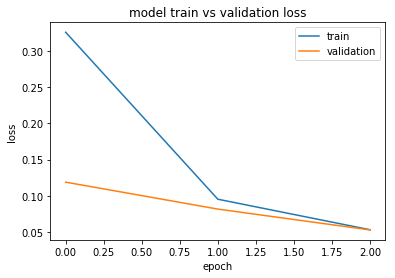

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101]
57 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1194 samples, validate on 300 samples
Epoch 1/3
1194/1194 [==============================] - 10s 8ms/step - loss: 0.5846 - val_loss: 0.1478
Epoch 2/3
1194/1194 [==============================] - 0s 108us/step - loss: 0.1207 - val_loss: 0.0930
Epoch 3/3
1194/1194 [==============================] - 0s 111us/step - loss: 0.0656 - val_loss: 0.0608


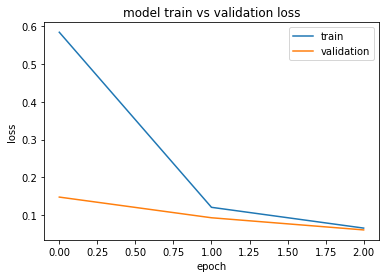

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638]
58 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1195 samples, validate on 300 samples
Epoch 1/3
1195/1195 [==============================] - 10s 8ms/step - loss: 0.2809 - val_loss: 0.1211
Epoch 2/3
1195/1195 [==============================] - 0s 112us/step - loss: 0.0935 - val_loss: 0.0621
Epoch 3/3
1195/1195 [==============================] - 0s 104us/step - loss: 0.0518 - val_loss: 0.0619


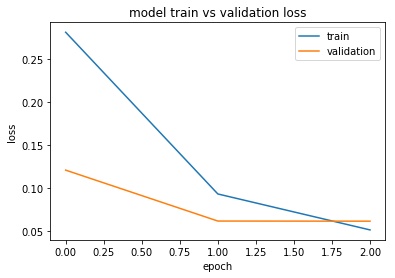

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262]
59 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1196 samples, validate on 300 samples
Epoch 1/3
1196/1196 [==============================] - 10s 9ms/step - loss: 0.0548 - val_loss: 0.0482
Epoch 2/3
1196/1196 [==============================] - 0s 107us/step - loss: 0.0366 - val_loss: 0.0478
Epoch 3/3
1196/1196 [==============================] - 0s 144us/step - loss: 0.0364 - val_loss: 0.0478


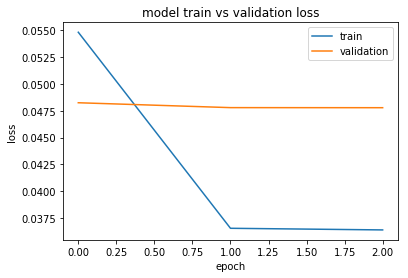

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798]
60 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1197 samples, validate on 300 samples
Epoch 1/3
1197/1197 [==============================] - 10s 9ms/step - loss: 0.0902 - val_loss: 0.0754
Epoch 2/3
1197/1197 [==============================] - 0s 111us/step - loss: 0.0549 - val_loss: 0.0503
Epoch 3/3
1197/1197 [==============================] - 0s 111us/step - loss: 0.0405 - val_loss: 0.0524


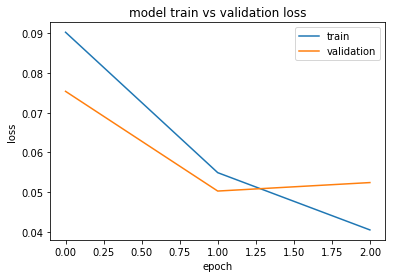

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212]
61 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1198 samples, validate on 300 samples
Epoch 1/3
1198/1198 [==============================] - 11s 9ms/step - loss: 0.1739 - val_loss: 0.1046
Epoch 2/3
1198/1198 [==============================] - 0s 106us/step - loss: 0.0637 - val_loss: 0.0583
Epoch 3/3
1198/1198 [==============================] - 0s 112us/step - loss: 0.0453 - val_loss: 0.0521


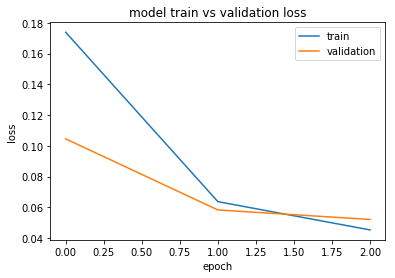

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484]
62 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1199 samples, validate on 300 samples
Epoch 1/3
1199/1199 [==============================] - 11s 9ms/step - loss: 0.0676 - val_loss: 0.0573
Epoch 2/3
1199/1199 [==============================] - 0s 119us/step - loss: 0.0413 - val_loss: 0.0523
Epoch 3/3
1199/1199 [==============================] - 0s 118us/step - loss: 0.0397 - val_loss: 0.0537


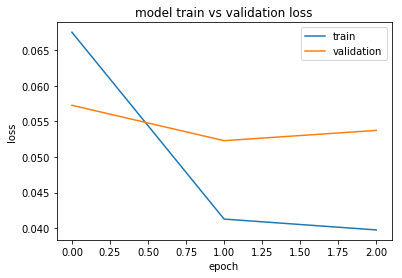

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935]
63 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1200 samples, validate on 300 samples
Epoch 1/3
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0827 - val_loss: 0.0609
Epoch 2/3
1200/1200 [==============================] - 0s 105us/step - loss: 0.0472 - val_loss: 0.0492
Epoch 3/3
1200/1200 [==============================] - 0s 106us/step - loss: 0.0400 - val_loss: 0.0516


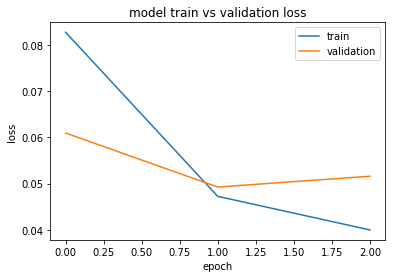

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543]
64 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1201 samples, validate on 300 samples
Epoch 1/3
1201/1201 [==============================] - 11s 9ms/step - loss: 0.0573 - val_loss: 0.0491
Epoch 2/3
1201/1201 [==============================] - 0s 105us/step - loss: 0.0424 - val_loss: 0.0491
Epoch 3/3
1201/1201 [==============================] - 0s 108us/step - loss: 0.0382 - val_loss: 0.0491


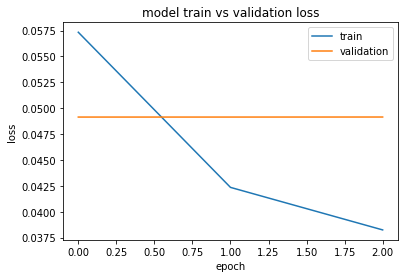

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772]
65 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1202 samples, validate on 300 samples
Epoch 1/3
1202/1202 [==============================] - 11s 9ms/step - loss: 0.0754 - val_loss: 0.0692
Epoch 2/3
1202/1202 [==============================] - 0s 114us/step - loss: 0.0442 - val_loss: 0.0571
Epoch 3/3
1202/1202 [==============================] - 0s 109us/step - loss: 0.0430 - val_loss: 0.0495


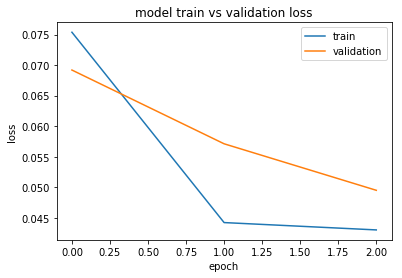

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026]
66 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1203 samples, validate on 300 samples
Epoch 1/3
1203/1203 [==============================] - 11s 9ms/step - loss: 0.2263 - val_loss: 0.1466
Epoch 2/3
1203/1203 [==============================] - 0s 172us/step - loss: 0.0818 - val_loss: 0.0728
Epoch 3/3
1203/1203 [==============================] - 0s 100us/step - loss: 0.0486 - val_loss: 0.0514


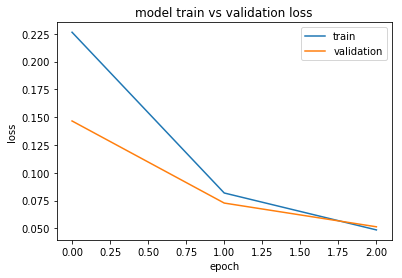

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423]
67 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1204 samples, validate on 300 samples
Epoch 1/3
1204/1204 [==============================] - 12s 10ms/step - loss: 0.0661 - val_loss: 0.0604
Epoch 2/3
1204/1204 [==============================] - 0s 113us/step - loss: 0.0443 - val_loss: 0.0537
Epoch 3/3
1204/1204 [==============================] - 0s 114us/step - loss: 0.0391 - val_loss: 0.0495


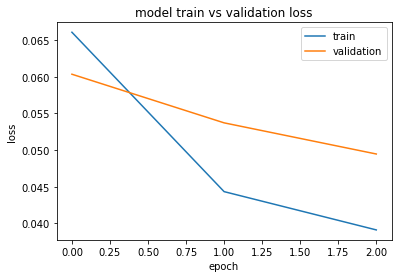

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245]
68 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1205 samples, validate on 300 samples
Epoch 1/3
1205/1205 [==============================] - 12s 10ms/step - loss: 0.1507 - val_loss: 0.0648
Epoch 2/3
1205/1205 [==============================] - 0s 101us/step - loss: 0.0600 - val_loss: 0.0536
Epoch 3/3
1205/1205 [==============================] - 0s 105us/step - loss: 0.0405 - val_loss: 0.0516


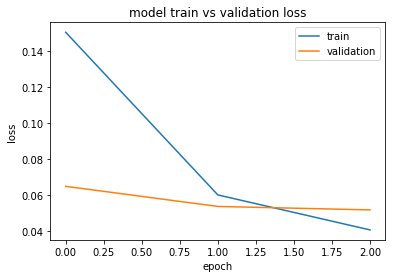

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873]
69 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1206 samples, validate on 300 samples
Epoch 1/3
1206/1206 [==============================] - 12s 10ms/step - loss: 0.0484 - val_loss: 0.0556
Epoch 2/3
1206/1206 [==============================] - 0s 114us/step - loss: 0.0390 - val_loss: 0.0525
Epoch 3/3
1206/1206 [==============================] - 0s 109us/step - loss: 0.0382 - val_loss: 0.0510


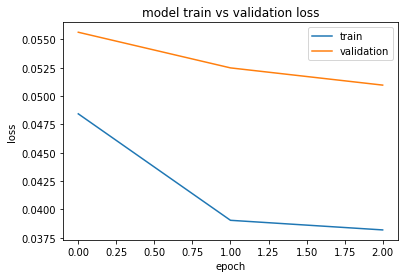

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576]
70 129


/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1207 samples, validate on 300 samples
Epoch 1/3
1207/1207 [==============================] - 12s 10ms/step - loss: 0.2673 - val_loss: 0.1582
Epoch 2/3
1207/1207 [==============================] - 0s 118us/step - loss: 0.0923 - val_loss: 0.0949
Epoch 3/3
1207/1207 [==============================] - 0s 115us/step - loss: 0.0539 - val_loss: 0.0519


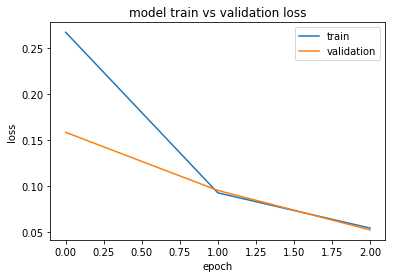

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1208 samples, validate on 300 samples
Epoch 1/3
1208/1208 [==============================] - 12s 10ms/step - loss: 0.2031 - val_loss: 0.1387
Epoch 2/3
1208/1208 [==============================] - 0s 158us/step - loss: 0.0766 - val_loss: 0.0504
Epoch 3/3
1208/1208 [==============================] - 0s 114us/step - loss: 0.0495 - val_loss: 0.0563


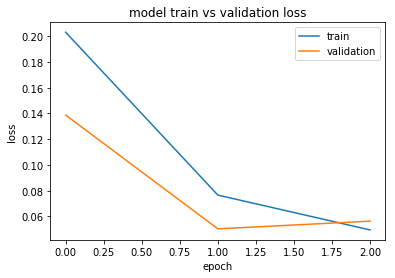

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1209 samples, validate on 300 samples
Epoch 1/3
1209/1209 [==============================] - 13s 11ms/step - loss: 0.1836 - val_loss: 0.1075
Epoch 2/3
1209/1209 [==============================] - 0s 115us/step - loss: 0.0644 - val_loss: 0.0561
Epoch 3/3
1209/1209 [==============================] - 0s 113us/step - loss: 0.0416 - val_loss: 0.0566


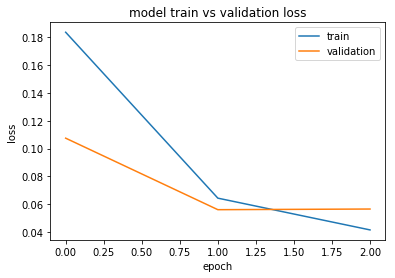

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1210 samples, validate on 300 samples
Epoch 1/3
1210/1210 [==============================] - 13s 11ms/step - loss: 0.2515 - val_loss: 0.1393
Epoch 2/3
1210/1210 [==============================] - 0s 129us/step - loss: 0.1007 - val_loss: 0.0650
Epoch 3/3
1210/1210 [==============================] - 0s 118us/step - loss: 0.0595 - val_loss: 0.0626


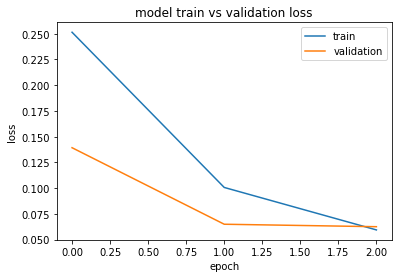

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1211 samples, validate on 300 samples
Epoch 1/3
1211/1211 [==============================] - 14s 11ms/step - loss: 0.1189 - val_loss: 0.0504
Epoch 2/3
1211/1211 [==============================] - 0s 106us/step - loss: 0.0485 - val_loss: 0.0547
Epoch 3/3
1211/1211 [==============================] - 0s 114us/step - loss: 0.0401 - val_loss: 0.0495


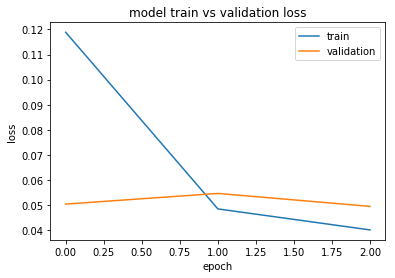

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1212 samples, validate on 300 samples
Epoch 1/3
1212/1212 [==============================] - 14s 11ms/step - loss: 0.1568 - val_loss: 0.0620
Epoch 2/3
1212/1212 [==============================] - 0s 111us/step - loss: 0.0574 - val_loss: 0.0575
Epoch 3/3
1212/1212 [==============================] - 0s 117us/step - loss: 0.0436 - val_loss: 0.0495


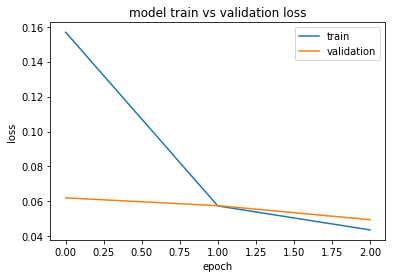

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1213 samples, validate on 300 samples
Epoch 1/3
1213/1213 [==============================] - 14s 11ms/step - loss: 0.0961 - val_loss: 0.0561
Epoch 2/3
1213/1213 [==============================] - 0s 104us/step - loss: 0.0528 - val_loss: 0.0621
Epoch 3/3
1213/1213 [==============================] - 0s 139us/step - loss: 0.0412 - val_loss: 0.0539


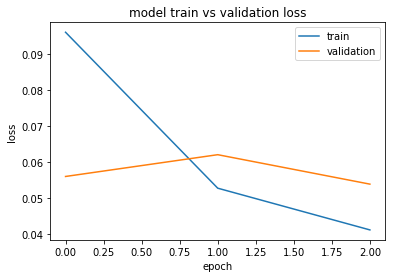

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1214 samples, validate on 300 samples
Epoch 1/3
1214/1214 [==============================] - 14s 11ms/step - loss: 0.1178 - val_loss: 0.0520
Epoch 2/3
1214/1214 [==============================] - 0s 119us/step - loss: 0.0484 - val_loss: 0.0689
Epoch 3/3
1214/1214 [==============================] - 0s 118us/step - loss: 0.0556 - val_loss: 0.0536


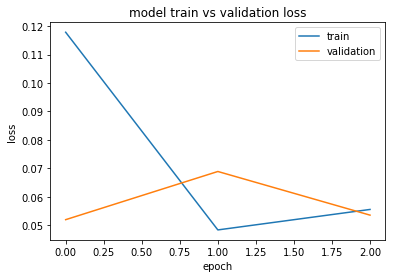

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1215 samples, validate on 300 samples
Epoch 1/3
1215/1215 [==============================] - 14s 12ms/step - loss: 0.9905 - val_loss: 0.4960
Epoch 2/3
1215/1215 [==============================] - 0s 112us/step - loss: 0.2167 - val_loss: 0.1694
Epoch 3/3
1215/1215 [==============================] - 0s 112us/step - loss: 0.1224 - val_loss: 0.0745


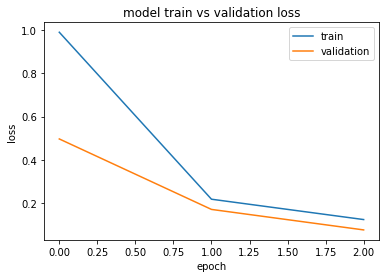

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1216 samples, validate on 300 samples
Epoch 1/3
1216/1216 [==============================] - 14s 12ms/step - loss: 0.1702 - val_loss: 0.0997
Epoch 2/3
1216/1216 [==============================] - 0s 109us/step - loss: 0.0642 - val_loss: 0.0490
Epoch 3/3
1216/1216 [==============================] - 0s 122us/step - loss: 0.0437 - val_loss: 0.0560


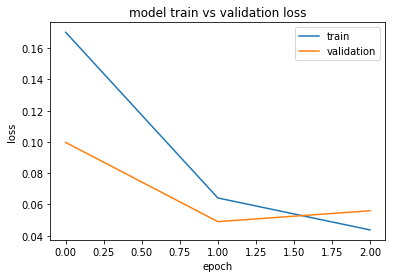

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1217 samples, validate on 300 samples
Epoch 1/3
1217/1217 [==============================] - 15s 12ms/step - loss: 0.0534 - val_loss: 0.0476
Epoch 2/3
1217/1217 [==============================] - 0s 113us/step - loss: 0.0358 - val_loss: 0.0462
Epoch 3/3
1217/1217 [==============================] - 0s 115us/step - loss: 0.0349 - val_loss: 0.0492


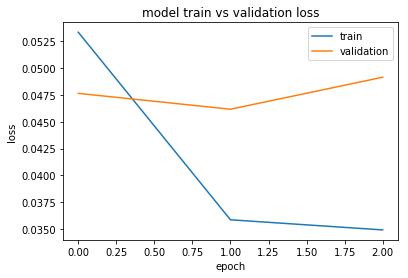

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1218 samples, validate on 300 samples
Epoch 1/3
1218/1218 [==============================] - 15s 12ms/step - loss: 0.0684 - val_loss: 0.0593
Epoch 2/3
1218/1218 [==============================] - 0s 112us/step - loss: 0.0403 - val_loss: 0.0514
Epoch 3/3
1218/1218 [==============================] - 0s 113us/step - loss: 0.0360 - val_loss: 0.0466


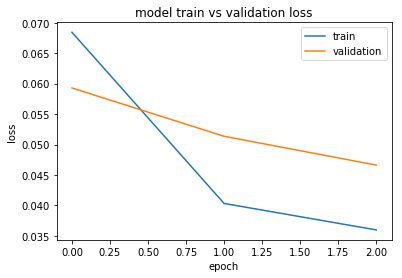

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1219 samples, validate on 300 samples
Epoch 1/3
1219/1219 [==============================] - 15s 12ms/step - loss: 0.3995 - val_loss: 0.1265
Epoch 2/3
1219/1219 [==============================] - 0s 121us/step - loss: 0.1265 - val_loss: 0.0787
Epoch 3/3
1219/1219 [==============================] - 0s 122us/step - loss: 0.0677 - val_loss: 0.0629


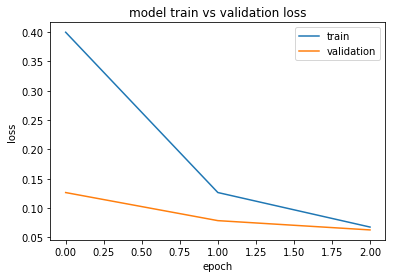

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1220 samples, validate on 300 samples
Epoch 1/3
1220/1220 [==============================] - 15s 13ms/step - loss: 0.0425 - val_loss: 0.0509
Epoch 2/3
1220/1220 [==============================] - 0s 105us/step - loss: 0.0375 - val_loss: 0.0490
Epoch 3/3
1220/1220 [==============================] - 0s 101us/step - loss: 0.0367 - val_loss: 0.0462


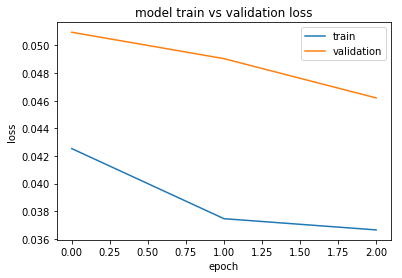

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1221 samples, validate on 300 samples
Epoch 1/3
1221/1221 [==============================] - 16s 13ms/step - loss: 0.0799 - val_loss: 0.0600
Epoch 2/3
1221/1221 [==============================] - 0s 104us/step - loss: 0.0424 - val_loss: 0.0474
Epoch 3/3
1221/1221 [==============================] - 0s 105us/step - loss: 0.0364 - val_loss: 0.0519


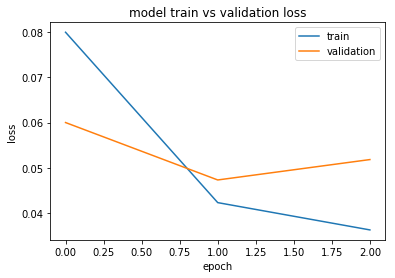

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1222 samples, validate on 300 samples
Epoch 1/3
1222/1222 [==============================] - 16s 13ms/step - loss: 0.0599 - val_loss: 0.0463
Epoch 2/3
1222/1222 [==============================] - 0s 114us/step - loss: 0.0405 - val_loss: 0.0468
Epoch 3/3
1222/1222 [==============================] - 0s 114us/step - loss: 0.0367 - val_loss: 0.0465


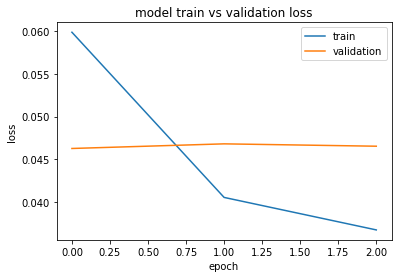

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1223 samples, validate on 300 samples
Epoch 1/3
1223/1223 [==============================] - 16s 13ms/step - loss: 0.1785 - val_loss: 0.0796
Epoch 2/3
1223/1223 [==============================] - 0s 112us/step - loss: 0.0551 - val_loss: 0.0503
Epoch 3/3
1223/1223 [==============================] - 0s 112us/step - loss: 0.0390 - val_loss: 0.0466


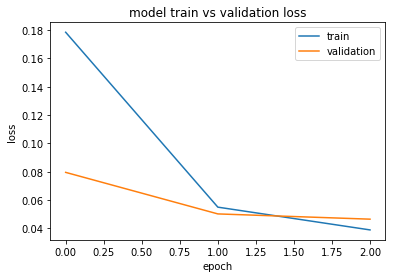

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1224 samples, validate on 300 samples
Epoch 1/3
1224/1224 [==============================] - 16s 13ms/step - loss: 0.7722 - val_loss: 0.2783
Epoch 2/3
1224/1224 [==============================] - 0s 113us/step - loss: 0.1462 - val_loss: 0.1458
Epoch 3/3
1224/1224 [==============================] - 0s 110us/step - loss: 0.0827 - val_loss: 0.0849


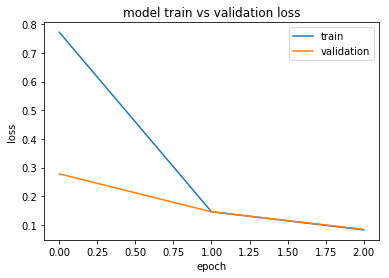

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1225 samples, validate on 300 samples
Epoch 1/3
1225/1225 [==============================] - 16s 13ms/step - loss: 0.1157 - val_loss: 0.0546
Epoch 2/3
1225/1225 [==============================] - 0s 112us/step - loss: 0.0520 - val_loss: 0.0482
Epoch 3/3
1225/1225 [==============================] - 0s 123us/step - loss: 0.0402 - val_loss: 0.0471


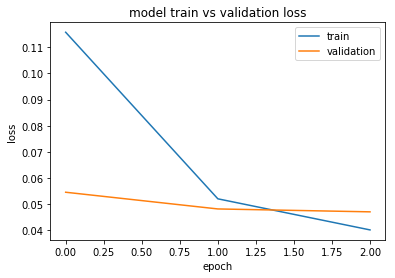

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1226 samples, validate on 300 samples
Epoch 1/3
1226/1226 [==============================] - 18s 15ms/step - loss: 0.4309 - val_loss: 0.0482
Epoch 2/3
1226/1226 [==============================] - 0s 130us/step - loss: 0.1147 - val_loss: 0.0483
Epoch 3/3
1226/1226 [==============================] - 0s 117us/step - loss: 0.0578 - val_loss: 0.0468


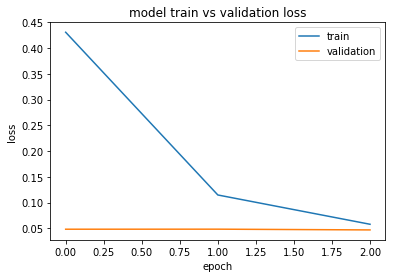

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1227 samples, validate on 300 samples
Epoch 1/3
1227/1227 [==============================] - 18s 14ms/step - loss: 0.3288 - val_loss: 0.1253
Epoch 2/3
1227/1227 [==============================] - 0s 109us/step - loss: 0.0989 - val_loss: 0.0820
Epoch 3/3
1227/1227 [==============================] - 0s 107us/step - loss: 0.0540 - val_loss: 0.0545


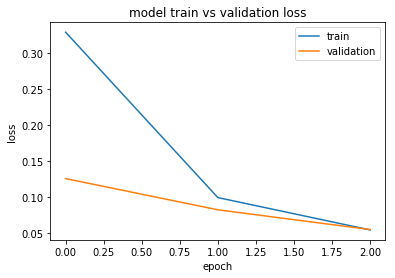

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1228 samples, validate on 300 samples
Epoch 1/3
1228/1228 [==============================] - 18s 15ms/step - loss: 0.0985 - val_loss: 0.0485
Epoch 2/3
1228/1228 [==============================] - 0s 119us/step - loss: 0.0431 - val_loss: 0.0489
Epoch 3/3
1228/1228 [==============================] - 0s 115us/step - loss: 0.0380 - val_loss: 0.0533


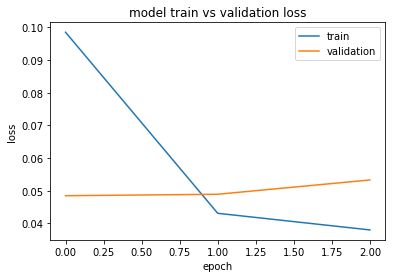

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1229 samples, validate on 300 samples
Epoch 1/3
1229/1229 [==============================] - 18s 14ms/step - loss: 0.2710 - val_loss: 0.1516
Epoch 2/3
1229/1229 [==============================] - 0s 116us/step - loss: 0.0920 - val_loss: 0.0798
Epoch 3/3
1229/1229 [==============================] - 0s 113us/step - loss: 0.0568 - val_loss: 0.0621


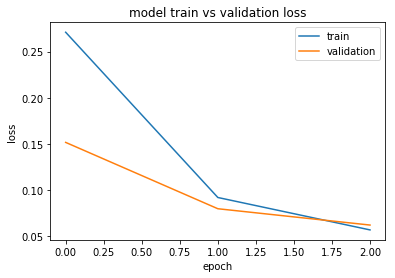

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1230 samples, validate on 300 samples
Epoch 1/3
1230/1230 [==============================] - 18s 15ms/step - loss: 0.0537 - val_loss: 0.0489
Epoch 2/3
1230/1230 [==============================] - 0s 106us/step - loss: 0.0375 - val_loss: 0.0468
Epoch 3/3
1230/1230 [==============================] - 0s 103us/step - loss: 0.0355 - val_loss: 0.0472


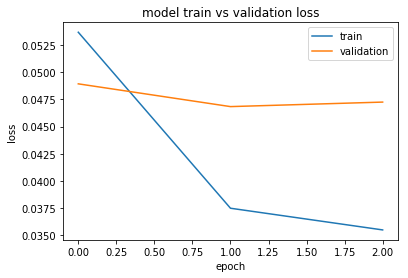

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1231 samples, validate on 300 samples
Epoch 1/3
1231/1231 [==============================] - 18s 15ms/step - loss: 0.3227 - val_loss: 0.1471
Epoch 2/3
1231/1231 [==============================] - 0s 166us/step - loss: 0.1044 - val_loss: 0.0878
Epoch 3/3
1231/1231 [==============================] - 0s 109us/step - loss: 0.0562 - val_loss: 0.0562


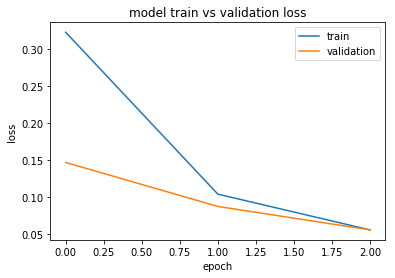

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1232 samples, validate on 300 samples
Epoch 1/3
1232/1232 [==============================] - 19s 15ms/step - loss: 0.1962 - val_loss: 0.1190
Epoch 2/3
1232/1232 [==============================] - 0s 107us/step - loss: 0.0714 - val_loss: 0.0480
Epoch 3/3
1232/1232 [==============================] - 0s 108us/step - loss: 0.0459 - val_loss: 0.0631


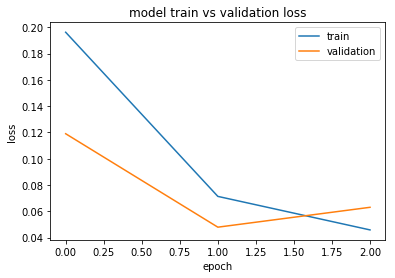

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1233 samples, validate on 300 samples
Epoch 1/3
1233/1233 [==============================] - 19s 15ms/step - loss: 0.6378 - val_loss: 0.1771
Epoch 2/3
1233/1233 [==============================] - 0s 120us/step - loss: 0.1269 - val_loss: 0.1117
Epoch 3/3
1233/1233 [==============================] - 0s 110us/step - loss: 0.0697 - val_loss: 0.0695


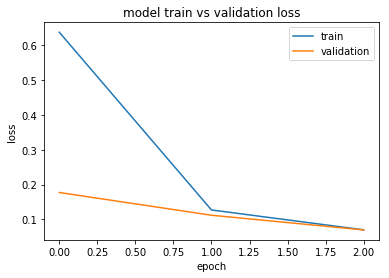

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1234 samples, validate on 300 samples
Epoch 1/3
1234/1234 [==============================] - 19s 15ms/step - loss: 0.3462 - val_loss: 0.0855
Epoch 2/3
1234/1234 [==============================] - 0s 120us/step - loss: 0.1021 - val_loss: 0.0488
Epoch 3/3
1234/1234 [==============================] - 0s 126us/step - loss: 0.0487 - val_loss: 0.0574


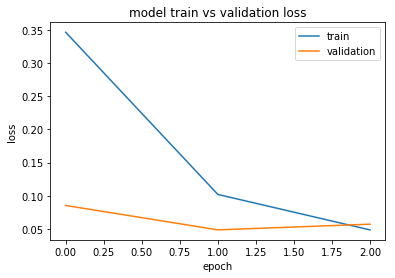

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1235 samples, validate on 300 samples
Epoch 1/3
1235/1235 [==============================] - 19s 16ms/step - loss: 0.0993 - val_loss: 0.0656
Epoch 2/3
1235/1235 [==============================] - 0s 120us/step - loss: 0.0481 - val_loss: 0.0468
Epoch 3/3
1235/1235 [==============================] - 0s 119us/step - loss: 0.0394 - val_loss: 0.0486


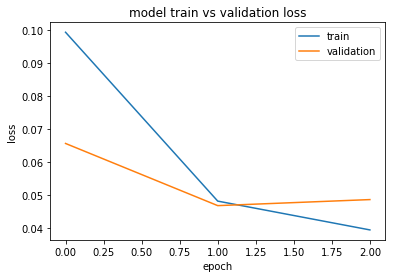

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1236 samples, validate on 300 samples
Epoch 1/3
1236/1236 [==============================] - 20s 16ms/step - loss: 0.0554 - val_loss: 0.0472
Epoch 2/3
1236/1236 [==============================] - 0s 117us/step - loss: 0.0359 - val_loss: 0.0467
Epoch 3/3
1236/1236 [==============================] - 0s 108us/step - loss: 0.0351 - val_loss: 0.0467


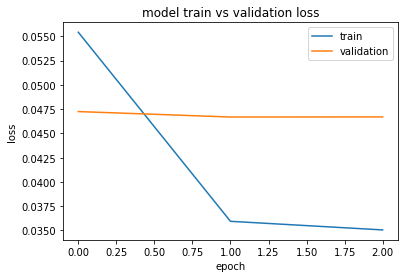

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1237 samples, validate on 300 samples
Epoch 1/3
1237/1237 [==============================] - 20s 16ms/step - loss: 0.2859 - val_loss: 0.1488
Epoch 2/3
1237/1237 [==============================] - 0s 116us/step - loss: 0.0934 - val_loss: 0.0904
Epoch 3/3
1237/1237 [==============================] - 0s 120us/step - loss: 0.0553 - val_loss: 0.0503


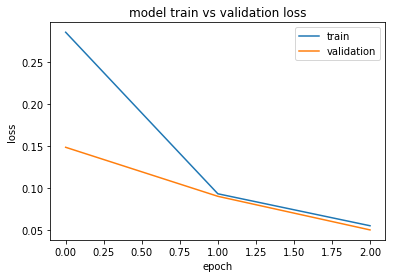

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1238 samples, validate on 300 samples
Epoch 1/3
1238/1238 [==============================] - 20s 16ms/step - loss: 0.0990 - val_loss: 0.0481
Epoch 2/3
1238/1238 [==============================] - 0s 115us/step - loss: 0.0396 - val_loss: 0.0468
Epoch 3/3
1238/1238 [==============================] - 0s 114us/step - loss: 0.0382 - val_loss: 0.0505


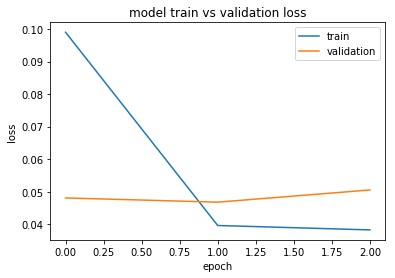

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1239 samples, validate on 300 samples
Epoch 1/3
1239/1239 [==============================] - 20s 16ms/step - loss: 0.6480 - val_loss: 0.1638
Epoch 2/3
1239/1239 [==============================] - 0s 112us/step - loss: 0.1332 - val_loss: 0.1212
Epoch 3/3
1239/1239 [==============================] - 0s 109us/step - loss: 0.0726 - val_loss: 0.0746


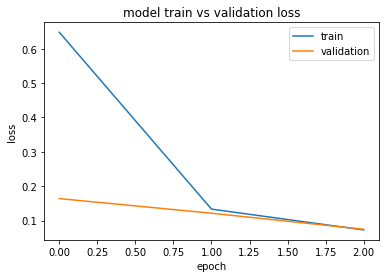

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1240 samples, validate on 300 samples
Epoch 1/3
1240/1240 [==============================] - 21s 17ms/step - loss: 0.3778 - val_loss: 0.0754
Epoch 2/3
1240/1240 [==============================] - 0s 103us/step - loss: 0.1272 - val_loss: 0.0483
Epoch 3/3
1240/1240 [==============================] - 0s 112us/step - loss: 0.0601 - val_loss: 0.0470


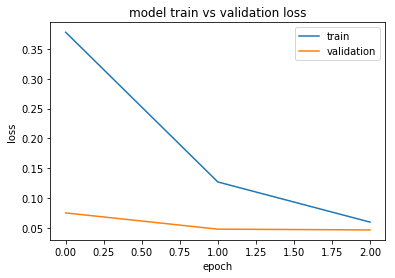

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1241 samples, validate on 300 samples
Epoch 1/3
1241/1241 [==============================] - 21s 17ms/step - loss: 0.0597 - val_loss: 0.0575
Epoch 2/3
1241/1241 [==============================] - 0s 117us/step - loss: 0.0377 - val_loss: 0.0471
Epoch 3/3
1241/1241 [==============================] - 0s 118us/step - loss: 0.0354 - val_loss: 0.0494


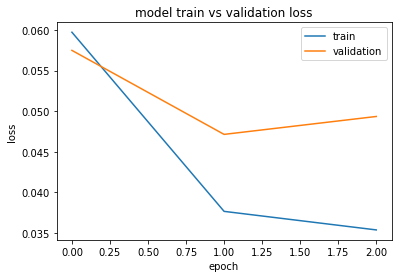

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1242 samples, validate on 300 samples
Epoch 1/3
1242/1242 [==============================] - 21s 17ms/step - loss: 0.1951 - val_loss: 0.1367
Epoch 2/3
1242/1242 [==============================] - 0s 111us/step - loss: 0.0773 - val_loss: 0.0695
Epoch 3/3
1242/1242 [==============================] - 0s 110us/step - loss: 0.0495 - val_loss: 0.0512


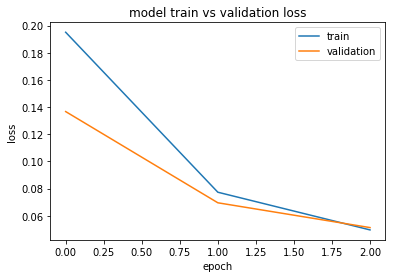

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1243 samples, validate on 300 samples
Epoch 1/3
1243/1243 [==============================] - 21s 17ms/step - loss: 0.0468 - val_loss: 0.0567
Epoch 2/3
1243/1243 [==============================] - 0s 130us/step - loss: 0.0447 - val_loss: 0.0527
Epoch 3/3
1243/1243 [==============================] - 0s 124us/step - loss: 0.0404 - val_loss: 0.0494


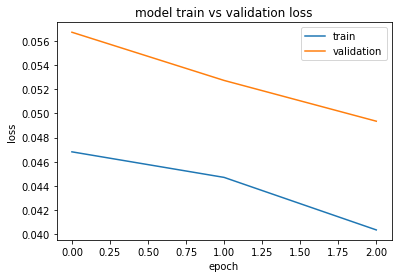

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1244 samples, validate on 300 samples
Epoch 1/3
1244/1244 [==============================] - 22s 17ms/step - loss: 0.1388 - val_loss: 0.0628
Epoch 2/3
1244/1244 [==============================] - 0s 119us/step - loss: 0.0551 - val_loss: 0.0574
Epoch 3/3
1244/1244 [==============================] - 0s 114us/step - loss: 0.0415 - val_loss: 0.0464


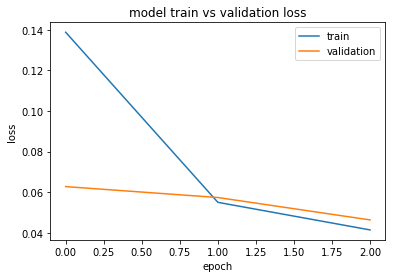

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1245 samples, validate on 300 samples
Epoch 1/3
1245/1245 [==============================] - 22s 17ms/step - loss: 0.0751 - val_loss: 0.0730
Epoch 2/3
1245/1245 [==============================] - 0s 110us/step - loss: 0.0469 - val_loss: 0.0487
Epoch 3/3
1245/1245 [==============================] - 0s 113us/step - loss: 0.0368 - val_loss: 0.0463


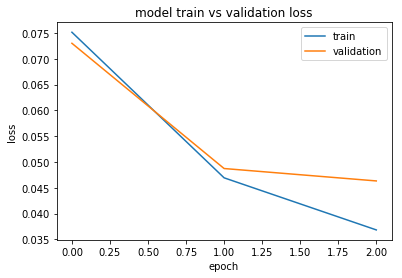

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1246 samples, validate on 300 samples
Epoch 1/3
1246/1246 [==============================] - 22s 18ms/step - loss: 0.8347 - val_loss: 0.2985
Epoch 2/3
1246/1246 [==============================] - 0s 116us/step - loss: 0.1460 - val_loss: 0.1809
Epoch 3/3
1246/1246 [==============================] - 0s 188us/step - loss: 0.0965 - val_loss: 0.0786


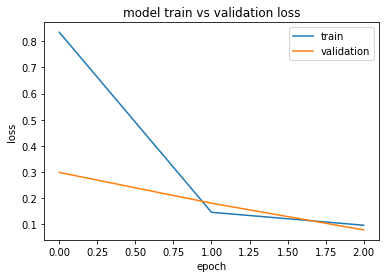

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1247 samples, validate on 300 samples
Epoch 1/3
1247/1247 [==============================] - 22s 18ms/step - loss: 0.2821 - val_loss: 0.1600
Epoch 2/3
1247/1247 [==============================] - 0s 119us/step - loss: 0.0989 - val_loss: 0.0935
Epoch 3/3
1247/1247 [==============================] - 0s 114us/step - loss: 0.0560 - val_loss: 0.0491


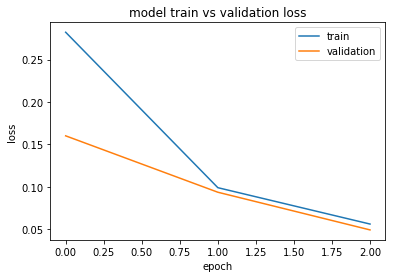

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1248 samples, validate on 300 samples
Epoch 1/3
1248/1248 [==============================] - 24s 19ms/step - loss: 0.1003 - val_loss: 0.0676
Epoch 2/3
1248/1248 [==============================] - 0s 115us/step - loss: 0.0471 - val_loss: 0.0499
Epoch 3/3
1248/1248 [==============================] - 0s 114us/step - loss: 0.0434 - val_loss: 0.0467


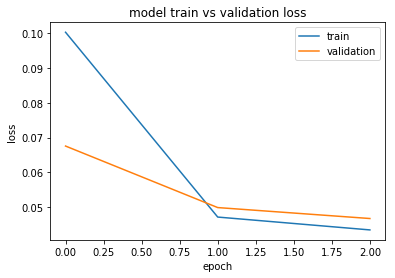

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1249 samples, validate on 300 samples
Epoch 1/3
1249/1249 [==============================] - 24s 19ms/step - loss: 0.2249 - val_loss: 0.1269
Epoch 2/3
1249/1249 [==============================] - 0s 119us/step - loss: 0.0754 - val_loss: 0.0683
Epoch 3/3
1249/1249 [==============================] - 0s 131us/step - loss: 0.0442 - val_loss: 0.0478


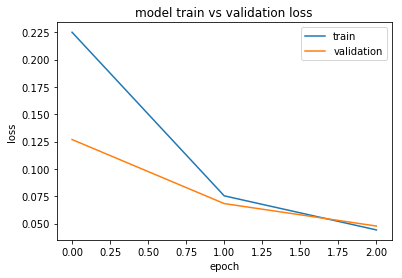

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1250 samples, validate on 300 samples
Epoch 1/3
1250/1250 [==============================] - 24s 19ms/step - loss: 0.0780 - val_loss: 0.0501
Epoch 2/3
1250/1250 [==============================] - 0s 95us/step - loss: 0.0433 - val_loss: 0.0493
Epoch 3/3
1250/1250 [==============================] - 0s 108us/step - loss: 0.0373 - val_loss: 0.0496


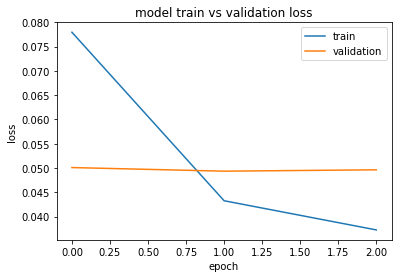

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1251 samples, validate on 300 samples
Epoch 1/3
1251/1251 [==============================] - 24s 19ms/step - loss: 0.0573 - val_loss: 0.0460
Epoch 2/3
1251/1251 [==============================] - 0s 136us/step - loss: 0.0424 - val_loss: 0.0511
Epoch 3/3
1251/1251 [==============================] - 0s 129us/step - loss: 0.0377 - val_loss: 0.0465


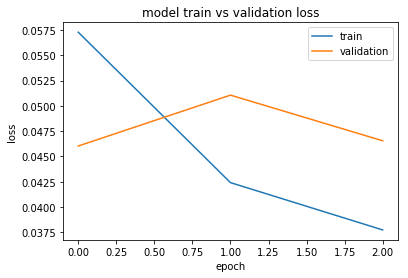

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1252 samples, validate on 300 samples
Epoch 1/3
1252/1252 [==============================] - 24s 19ms/step - loss: 0.2537 - val_loss: 0.1465
Epoch 2/3
1252/1252 [==============================] - 0s 123us/step - loss: 0.0857 - val_loss: 0.0813
Epoch 3/3
1252/1252 [==============================] - 0s 126us/step - loss: 0.0529 - val_loss: 0.0472


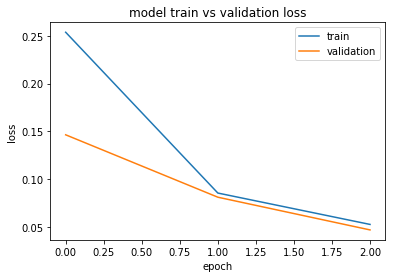

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1253 samples, validate on 300 samples
Epoch 1/3
1253/1253 [==============================] - 24s 19ms/step - loss: 0.2087 - val_loss: 0.1224
Epoch 2/3
1253/1253 [==============================] - 0s 105us/step - loss: 0.0738 - val_loss: 0.0633
Epoch 3/3
1253/1253 [==============================] - 0s 106us/step - loss: 0.0447 - val_loss: 0.0475


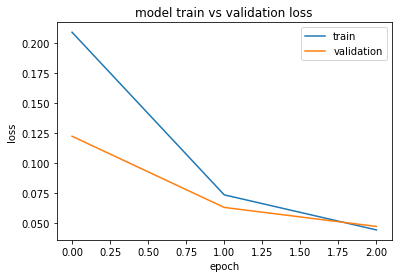

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1254 samples, validate on 300 samples
Epoch 1/3
1254/1254 [==============================] - 25s 20ms/step - loss: 0.6004 - val_loss: 0.1055
Epoch 2/3
1254/1254 [==============================] - 0s 118us/step - loss: 0.1308 - val_loss: 0.0734
Epoch 3/3
1254/1254 [==============================] - 0s 119us/step - loss: 0.0665 - val_loss: 0.0503


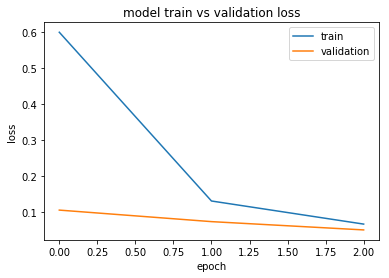

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1255 samples, validate on 300 samples
Epoch 1/3
1255/1255 [==============================] - 25s 20ms/step - loss: 0.1911 - val_loss: 0.1159
Epoch 2/3
1255/1255 [==============================] - 0s 117us/step - loss: 0.0685 - val_loss: 0.0604
Epoch 3/3
1255/1255 [==============================] - 0s 120us/step - loss: 0.0438 - val_loss: 0.0487


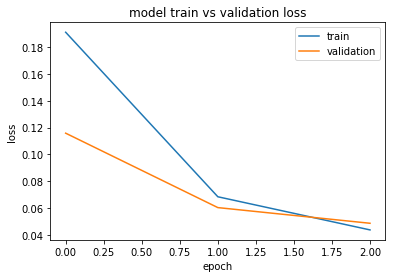

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1256 samples, validate on 300 samples
Epoch 1/3
1256/1256 [==============================] - 25s 20ms/step - loss: 0.4050 - val_loss: 0.0919
Epoch 2/3
1256/1256 [==============================] - 0s 110us/step - loss: 0.1116 - val_loss: 0.0661
Epoch 3/3
1256/1256 [==============================] - 0s 116us/step - loss: 0.0549 - val_loss: 0.0541


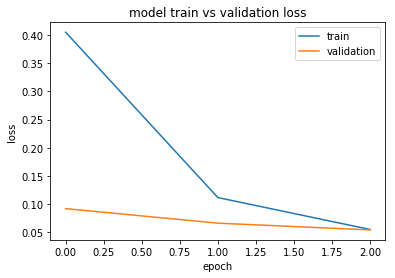

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1257 samples, validate on 300 samples
Epoch 1/3
1257/1257 [==============================] - 26s 21ms/step - loss: 0.1780 - val_loss: 0.1017
Epoch 2/3
1257/1257 [==============================] - 0s 115us/step - loss: 0.0613 - val_loss: 0.0494
Epoch 3/3
1257/1257 [==============================] - 0s 107us/step - loss: 0.0401 - val_loss: 0.0501


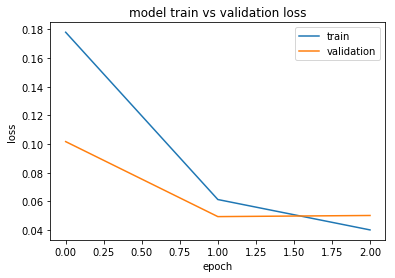

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1258 samples, validate on 300 samples
Epoch 1/3
1258/1258 [==============================] - 26s 21ms/step - loss: 0.0456 - val_loss: 0.0520
Epoch 2/3
1258/1258 [==============================] - 0s 122us/step - loss: 0.0381 - val_loss: 0.0456
Epoch 3/3
1258/1258 [==============================] - 0s 124us/step - loss: 0.0358 - val_loss: 0.0458


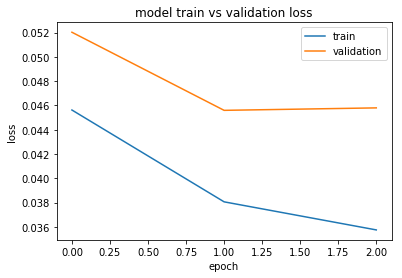

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1259 samples, validate on 300 samples
Epoch 1/3
1259/1259 [==============================] - 26s 21ms/step - loss: 0.1662 - val_loss: 0.0969
Epoch 2/3
1259/1259 [==============================] - 0s 101us/step - loss: 0.0604 - val_loss: 0.0463
Epoch 3/3
1259/1259 [==============================] - 0s 105us/step - loss: 0.0408 - val_loss: 0.0531


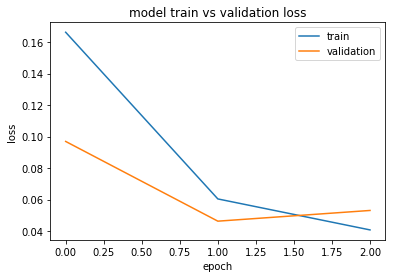

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1260 samples, validate on 300 samples
Epoch 1/3
1260/1260 [==============================] - 27s 21ms/step - loss: 0.1125 - val_loss: 0.0518
Epoch 2/3
1260/1260 [==============================] - 0s 114us/step - loss: 0.0449 - val_loss: 0.0504
Epoch 3/3
1260/1260 [==============================] - 0s 119us/step - loss: 0.0405 - val_loss: 0.0481


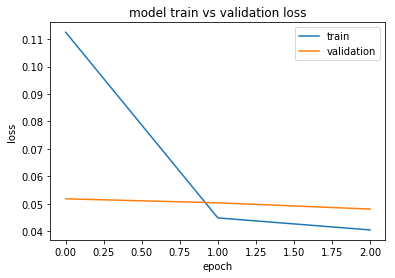

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1261 samples, validate on 300 samples
Epoch 1/3
1261/1261 [==============================] - 27s 21ms/step - loss: 0.3315 - val_loss: 0.1153
Epoch 2/3
1261/1261 [==============================] - 0s 125us/step - loss: 0.1034 - val_loss: 0.0707
Epoch 3/3
1261/1261 [==============================] - 0s 115us/step - loss: 0.0528 - val_loss: 0.0534


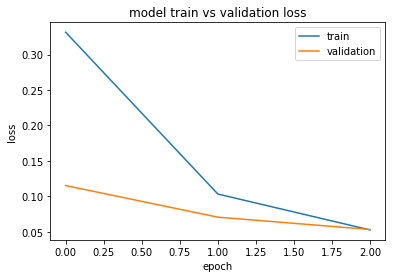

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1262 samples, validate on 300 samples
Epoch 1/3
1262/1262 [==============================] - 27s 22ms/step - loss: 0.0508 - val_loss: 0.0461
Epoch 2/3
1262/1262 [==============================] - 0s 123us/step - loss: 0.0365 - val_loss: 0.0458
Epoch 3/3
1262/1262 [==============================] - 0s 123us/step - loss: 0.0356 - val_loss: 0.0525


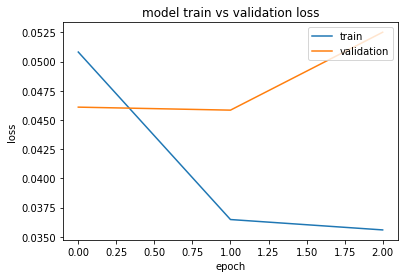

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1263 samples, validate on 300 samples
Epoch 1/3
1263/1263 [==============================] - 27s 22ms/step - loss: 0.1185 - val_loss: 0.0555
Epoch 2/3
1263/1263 [==============================] - 0s 118us/step - loss: 0.0456 - val_loss: 0.0639
Epoch 3/3
1263/1263 [==============================] - 0s 123us/step - loss: 0.0478 - val_loss: 0.0477


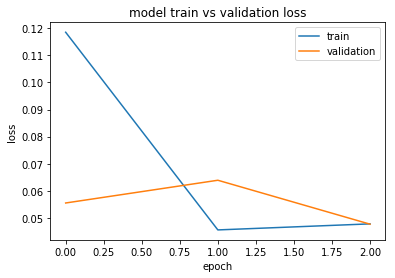

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 1264 samples, validate on 300 samples
Epoch 1/3
1264/1264 [==============================] - 28s 22ms/step - loss: 0.6026 - val_loss: 0.1714
Epoch 2/3
1264/1264 [==============================] - 0s 122us/step - loss: 0.1094 - val_loss: 0.1333
Epoch 3/3
1264/1264 [==============================] - 0s 120us/step - loss: 0.0704 - val_loss: 0.0697


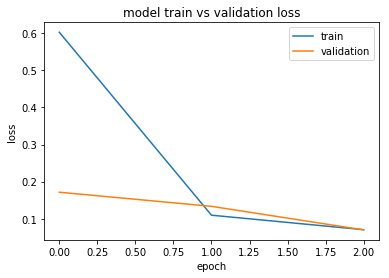

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

In [7]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import statsmodels.api as sm
from keras.callbacks import ReduceLROnPlateau

scalerX = MinMaxScaler(feature_range=(0, 1))
scalerY = MinMaxScaler(feature_range=(0, 1))
end = int(len(var1)/10)
test = val
for i in range(1, 2):
    variables_in = feature_importances.index[:]
#     trainX = train1[variables_in]
#     trainY = train1['y_return_ratio']
    
#     valX = val[variables_in]
#     valY = val['y_return_ratio']
    predictions= []
    for i in range(len(test)):
        chunkX = pd.concat([train, test[:i]]).asfreq('B', method='bfill').fillna(method='bfill')[variables_in]
        chunkY = pd.concat([train, test[:i]]).asfreq('B', method='bfill').fillna(method='bfill')['y_return_ratio']
        
        trainX = chunkX[:-300]
        trainY = chunkY[:-300]
        
        valX = chunkX[-300:]
        valY = chunkY[-300:]

        testX = test[i:i+1][variables_in]
        testY = test[i:i+1]['y_return_ratio']

        features_set = scalerX.fit_transform(trainX)
        features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
        labels = scalerY.fit_transform(np.array(trainY).reshape(-1, 1))

        val_features_set = scalerX.transform(valX)
        val_features_set = np.reshape(val_features_set, (val_features_set.shape[0], val_features_set.shape[1], 1))
        val_labels = scalerY.transform(np.array(valY).reshape(-1, 1))
        
        test_features_set = scalerX.transform(testX)
        test_features_set = np.reshape(test_features_set, (test_features_set.shape[0], test_features_set.shape[1], 1))
        
        model = Sequential()

        model.add(LSTM(units=features_set.shape[1], activation='sigmoid', input_shape=(features_set.shape[1], 1)))
        model.add(Dense(units = 1, activation='linear'))

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
        opt = Adam(lr=0.005)

        model.compile(optimizer = opt, loss = 'mae')
        history = model.fit(features_set, labels, epochs = 3, batch_size = int(len(trainX)/10), validation_data=(val_features_set, val_labels), callbacks=[es], verbose=1)
        
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model train vs validation loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.show()
        
        predictions.append(scalerY.inverse_transform(model.predict(test_features_set).reshape(-1, 1))[0][0])
        print(predictions)
        print(i, len(test))
#     predictions = scalerY.inverse_transform(predictions)

#     plt.plot(predictions)

[-0.0025860304, -0.0018729987, 0.010582481, 0.008323675, 0.0016560124, 0.0015171281, 0.009265608, 0.0004824529, 0.00036035903, -0.0006553535, 0.00034178977, -0.008792569, 0.009328475, -0.009228417, -0.0035062423, -0.003291025, -0.03882055, 0.011281185, 0.00013201419, -0.0041656313, -0.0038433261, 0.0010577397, -0.02463503, -0.008365149, 0.0048603816, 0.014647901, 0.0011147942, -0.0050269156, 0.00091722625, -0.011717784, -0.009463799, 0.002749604, 0.010580307, 0.007218152, 0.004850252, 0.0015821288, 0.00412988, 0.007955514, 0.0029557664, 0.005042284, 0.0030870424, 0.0010093855, -0.00063389714, 0.011958212, -0.0064691333, 0.016239382, 0.0044381265, -0.0019657747, 0.010257747, 0.0043650297, 0.0014169338, -0.006974837, -0.012339973, 0.013717642, 0.007467565, 0.0013370711, -0.0025454394, 0.0134101, -0.011772638, -0.013341262, 0.0035684798, 0.011316212, -0.005339484, -0.00562935, -0.0031119543, 0.0039024772, 0.00048391026, -0.0035628423, 0.0005262245, -0.0027921873, -0.0024316576, 0.00953305

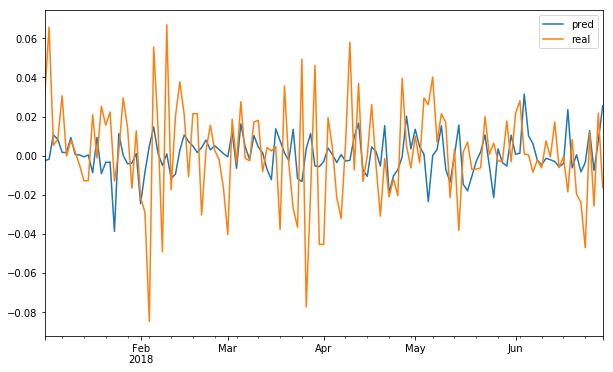

0.02645270458400687


In [8]:
print(predictions)
plt.figure(figsize=(10,6))
pd.Series(predictions, index=test.index[:len(predictions)]).plot(label='pred')
test['y_return_ratio'].plot(label="real")
plt.legend()
plt.show()
print(rmse(predictions, test.iloc[:len(predictions)]['y_return_ratio']))

In [ ]:
# X_train1 = train1[var1]
# y_train1 = train1[target]
# X_test1 = test[var1]
# y_test1 = test[target]

# model = ExtraTreesRegressor()
# model.fit(X_train1, y_train1)
# feature_importances = pd.DataFrame(model.feature_importances_, index=X_train1.columns, columns=['importance']).sort_values('importance', ascending=False)
# feature_importances

In [2]:
# X_train1 = train1[var1]
# y_train1 = train1[target]
# X_test1 = test[var1]
# y_test1 = test[target]

# model = ExtraTreesRegressor()
# model.fit(X_train1, y_train1)
# feature_importances = pd.DataFrame(model.feature_importances_, index=X_train1.columns, columns=['importance']).sort_values('importance', ascending=False)
# feature_importances

In [ ]:
# X_train1 = train1[var1]
# y_train1 = train1[target]
# X_test1 = test[var1]
# y_test1 = test[target]

# model = ExtraTreesRegressor()
# model.fit(X_train1, y_train1)
# feature_importances = pd.DataFrame(model.feature_importances_, index=X_train1.columns, columns=['importance']).sort_values('importance', ascending=False)
# feature_importances

In [ ]:
# X_train1 = train1[var1]
# y_train1 = train1[target]
# X_test1 = test[var1]
# y_test1 = test[target]

# model = ExtraTreesRegressor()
# model.fit(X_train1, y_train1)
# feature_importances = pd.DataFrame(model.feature_importances_, index=X_train1.columns, columns=['importance']).sort_values('importance', ascending=False)
# feature_importances